In [1]:
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
plt.rcParams["figure.figsize"] = (20,15)
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, plot_confusion_matrix
from sklearn.model_selection import GridSearchCV

In [2]:
columns = ['X_Minimum', 'X_Maximum', 'Y_Minimum', 'Y_Maximum', 'Pixels_Areas', 'X_Perimeter', 'Y_Perimeter', 'Sum_of_Luminosity',
                   'Minimum_of_Luminosity', 'Maximum_of_Luminosity', 'Length_of_Conveyer', 'TypeOfSteel_A300', 'TypeOfSteel_A400', 
                   'Steel_Plate_Thickness', 'Edges_Index', 'Empty_Index', 'Square_Index', 'Outside_X_Index', 'Edges_X_Index', 'Edges_Y_Index', 
                   'Outside_Global_Index', 'LogOfAreas', 'Log_X_Index', 'Log_Y_Index', 'Orientation_Index', 'Luminosity_Index', 'SigmoidOfAreas',
                   'Pastry', 'Z_Scratch', 'K_Scatch', 'Stains', 'Dirtiness', 'Bumps', 'Other_Faults']
data = pd.read_csv('faults.csv', sep='\t', header= None, names=columns )
data

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
0,42,50,270900,270944,267,17,44,24220,76,108,...,0.8182,-0.2913,0.5822,1,0,0,0,0,0,0
1,645,651,2538079,2538108,108,10,30,11397,84,123,...,0.7931,-0.1756,0.2984,1,0,0,0,0,0,0
2,829,835,1553913,1553931,71,8,19,7972,99,125,...,0.6667,-0.1228,0.2150,1,0,0,0,0,0,0
3,853,860,369370,369415,176,13,45,18996,99,126,...,0.8444,-0.1568,0.5212,1,0,0,0,0,0,0
4,1289,1306,498078,498335,2409,60,260,246930,37,126,...,0.9338,-0.1992,1.0000,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1936,249,277,325780,325796,273,54,22,35033,119,141,...,-0.4286,0.0026,0.7254,0,0,0,0,0,0,1
1937,144,175,340581,340598,287,44,24,34599,112,133,...,-0.4516,-0.0582,0.8173,0,0,0,0,0,0,1
1938,145,174,386779,386794,292,40,22,37572,120,140,...,-0.4828,0.0052,0.7079,0,0,0,0,0,0,1
1939,137,170,422497,422528,419,97,47,52715,117,140,...,-0.0606,-0.0171,0.9919,0,0,0,0,0,0,1


Since <b>TypeOfSteel_A300 and TypeOfSteel_A400 </b> are dummy variables for type of steel plates. They are redudent features so we can keep only one feature. We are removing TypeOfSteel_A400. 

In [3]:
del data['TypeOfSteel_A400']
data.head(5)

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
0,42,50,270900,270944,267,17,44,24220,76,108,...,0.8182,-0.2913,0.5822,1,0,0,0,0,0,0
1,645,651,2538079,2538108,108,10,30,11397,84,123,...,0.7931,-0.1756,0.2984,1,0,0,0,0,0,0
2,829,835,1553913,1553931,71,8,19,7972,99,125,...,0.6667,-0.1228,0.2150,1,0,0,0,0,0,0
3,853,860,369370,369415,176,13,45,18996,99,126,...,0.8444,-0.1568,0.5212,1,0,0,0,0,0,0
4,1289,1306,498078,498335,2409,60,260,246930,37,126,...,0.9338,-0.1992,1.0000,1,0,0,0,0,0,0


### Reverse Encoding 

Since the fault types of steel plates, namely <b>Pastry, Z_Scratch, K_Scatch Stains, Dirtiness, Bumps, and Other_Faults</b> are encoded using a one-hot encoding approach in the original datasets, So, for simplicity, we will reverse the encoded datasets (decoding). A single column name <b>fault_type</b> will be created.


In [4]:
X =  data.iloc[:,:26]
y_raw = data.iloc[:,26:33]
y = pd.DataFrame([i for i in np.where(y_raw ==1, y_raw.columns,'').flatten().tolist() if len(i) >0],columns= (["fault_type"]))
df = pd.concat([X, y], axis=1)
df.head()

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas,fault_type
0,42,50,270900,270944,267,17,44,24220,76,108,...,0.4706,1.0000,1.0,2.4265,0.9031,1.6435,0.8182,-0.2913,0.5822,Pastry
1,645,651,2538079,2538108,108,10,30,11397,84,123,...,0.6000,0.9667,1.0,2.0334,0.7782,1.4624,0.7931,-0.1756,0.2984,Pastry
2,829,835,1553913,1553931,71,8,19,7972,99,125,...,0.7500,0.9474,1.0,1.8513,0.7782,1.2553,0.6667,-0.1228,0.2150,Pastry
3,853,860,369370,369415,176,13,45,18996,99,126,...,0.5385,1.0000,1.0,2.2455,0.8451,1.6532,0.8444,-0.1568,0.5212,Pastry
4,1289,1306,498078,498335,2409,60,260,246930,37,126,...,0.2833,0.9885,1.0,3.3818,1.2305,2.4099,0.9338,-0.1992,1.0000,Pastry


####  Check missing value

In [5]:
data.isnull().sum()

X_Minimum                0
X_Maximum                0
Y_Minimum                0
Y_Maximum                0
Pixels_Areas             0
X_Perimeter              0
Y_Perimeter              0
Sum_of_Luminosity        0
Minimum_of_Luminosity    0
Maximum_of_Luminosity    0
Length_of_Conveyer       0
TypeOfSteel_A300         0
Steel_Plate_Thickness    0
Edges_Index              0
Empty_Index              0
Square_Index             0
Outside_X_Index          0
Edges_X_Index            0
Edges_Y_Index            0
Outside_Global_Index     0
LogOfAreas               0
Log_X_Index              0
Log_Y_Index              0
Orientation_Index        0
Luminosity_Index         0
SigmoidOfAreas           0
Pastry                   0
Z_Scratch                0
K_Scatch                 0
Stains                   0
Dirtiness                0
Bumps                    0
Other_Faults             0
dtype: int64

## EDA

### Feature Scaling
Learn more about <a href="https://en.wikipedia.org/wiki/Feature_scaling">Feature Scaling</a> and comparision of different scaling methodologies <a href="https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html#sphx-glr-auto-examples-preprocessing-plot-all-scaling-py">here. 

In [6]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X),columns = X.columns)
X

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas
0,-1.016481,-1.141639,-0.777729,-0.777729,-0.314852,-0.314996,-0.091389,-0.355537,-0.266099,-1.187708,...,-0.486227,-0.575331,0.796401,0.879804,-0.083538,-0.898437,0.528872,1.467656,-1.075752,-0.009490
1,0.141894,0.066403,0.500188,0.500171,-0.345623,-0.338242,-0.124225,-0.380574,-0.017079,-0.384975,...,-0.504888,-0.043290,0.654223,0.879804,-0.581936,-1.157841,0.130174,1.417530,-0.297824,-0.845759
2,0.495362,0.436253,-0.054546,-0.054566,-0.352784,-0.344883,-0.150024,-0.387261,0.449832,-0.277944,...,-0.503191,0.573451,0.571820,0.879804,-0.812814,-1.157841,-0.325764,1.165103,0.057185,-1.091513
3,0.541467,0.486504,-0.722225,-0.722225,-0.332463,-0.328279,-0.089044,-0.365736,0.449832,-0.224429,...,-0.477744,-0.296153,0.796401,0.879804,-0.313021,-1.018897,0.550227,1.519978,-0.171419,-0.189237
4,1.379032,1.382988,-0.649678,-0.649559,0.099692,-0.172201,0.415209,0.079307,-1.480069,-0.224429,...,-0.352206,-1.345434,0.747301,0.879804,1.127655,-0.218461,2.216130,1.698514,-0.456503,1.221636
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1936,-0.618830,-0.685357,-0.746795,-0.746811,-0.313690,-0.192126,-0.142987,-0.334424,1.072381,0.578304,...,-0.216488,-0.378385,-0.367922,-1.193905,-0.071239,0.231603,-0.438483,-1.022264,0.900332,0.412476
1937,-0.820537,-0.890382,-0.738452,-0.738468,-0.310981,-0.225334,-0.138297,-0.335271,0.854489,0.150180,...,-0.179166,0.386784,-0.449045,-1.193905,-0.043727,0.323402,-0.380362,-1.068196,0.491534,0.683276
1938,-0.818616,-0.892392,-0.712412,-0.712430,-0.310013,-0.238617,-0.142987,-0.329467,1.103509,0.524788,...,-0.204613,0.470661,-0.562189,-1.193905,-0.034218,0.263172,-0.500126,-1.130504,0.917814,0.360909
1939,-0.833984,-0.900432,-0.692280,-0.692288,-0.285435,-0.049331,-0.084353,-0.299900,1.010126,0.524788,...,-0.153719,-1.111484,-0.656975,-1.193905,0.164584,0.379686,0.194019,-0.287351,0.767876,1.197767


### 1. Histogram and density distribution

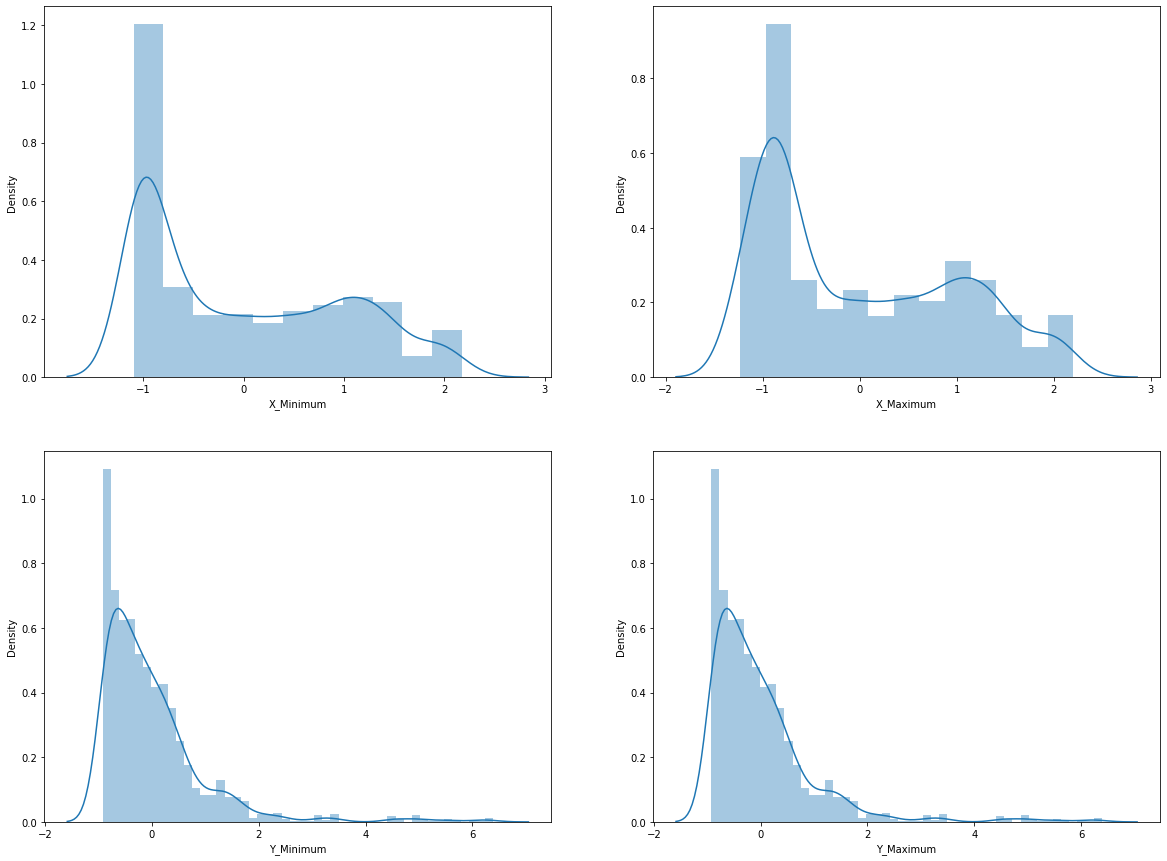

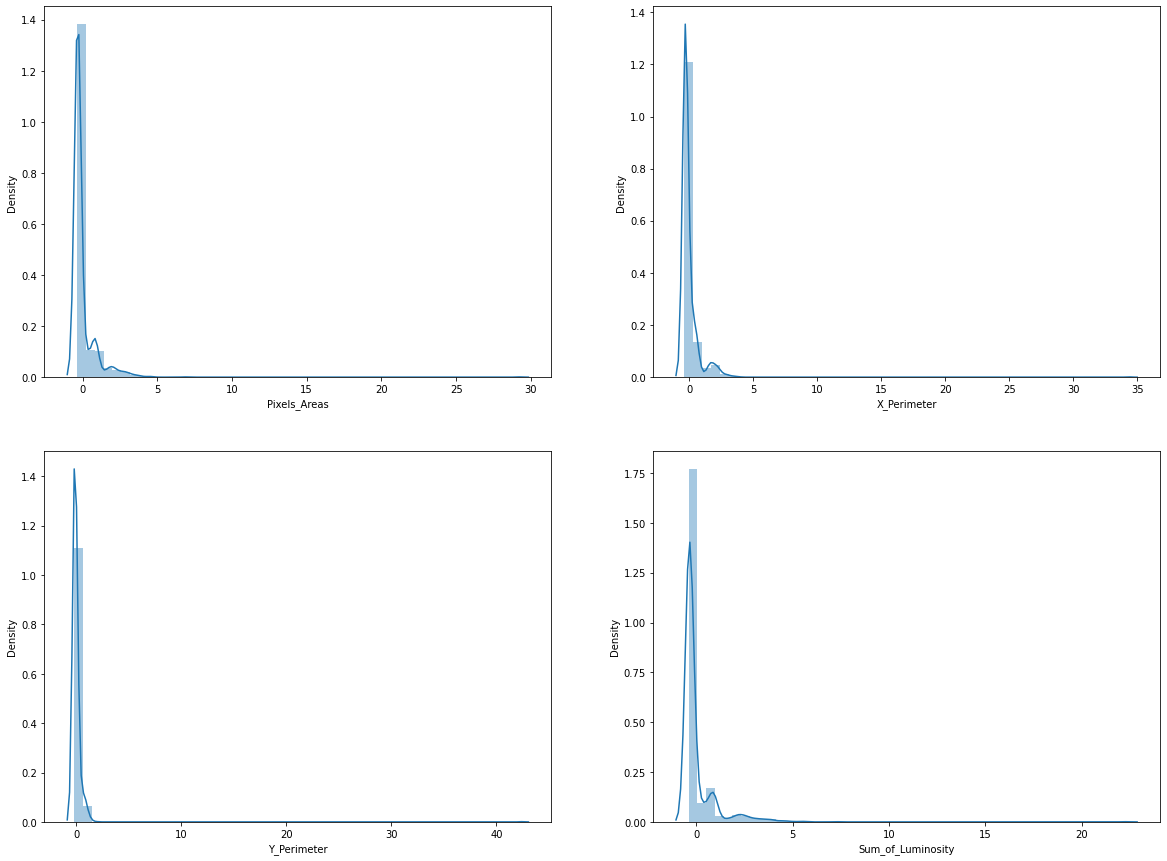

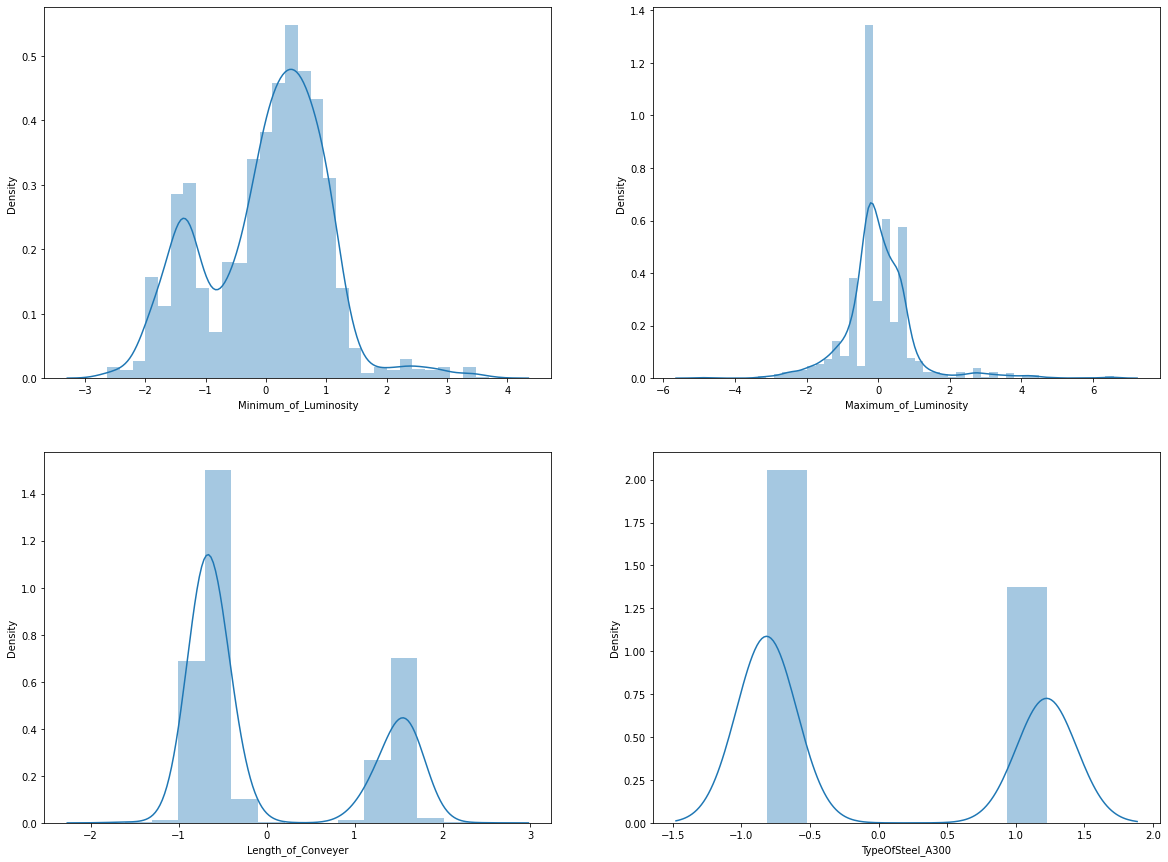

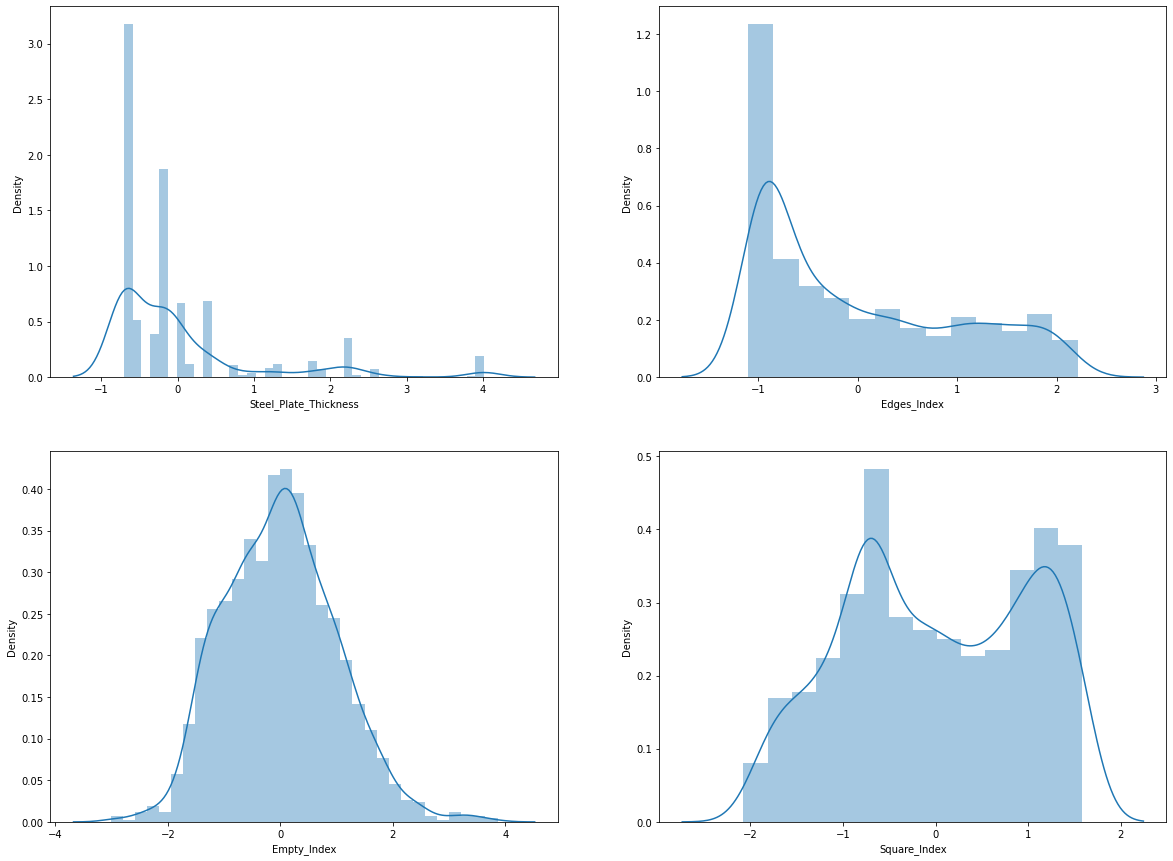

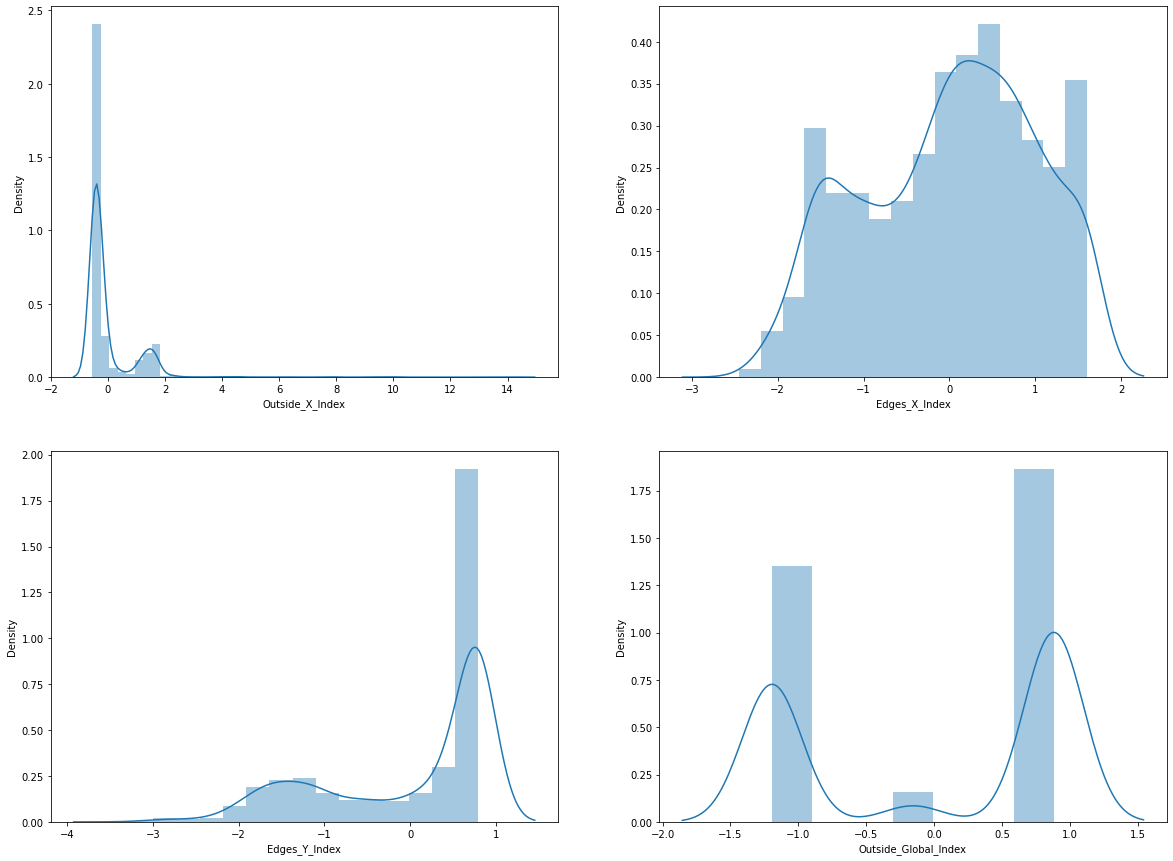

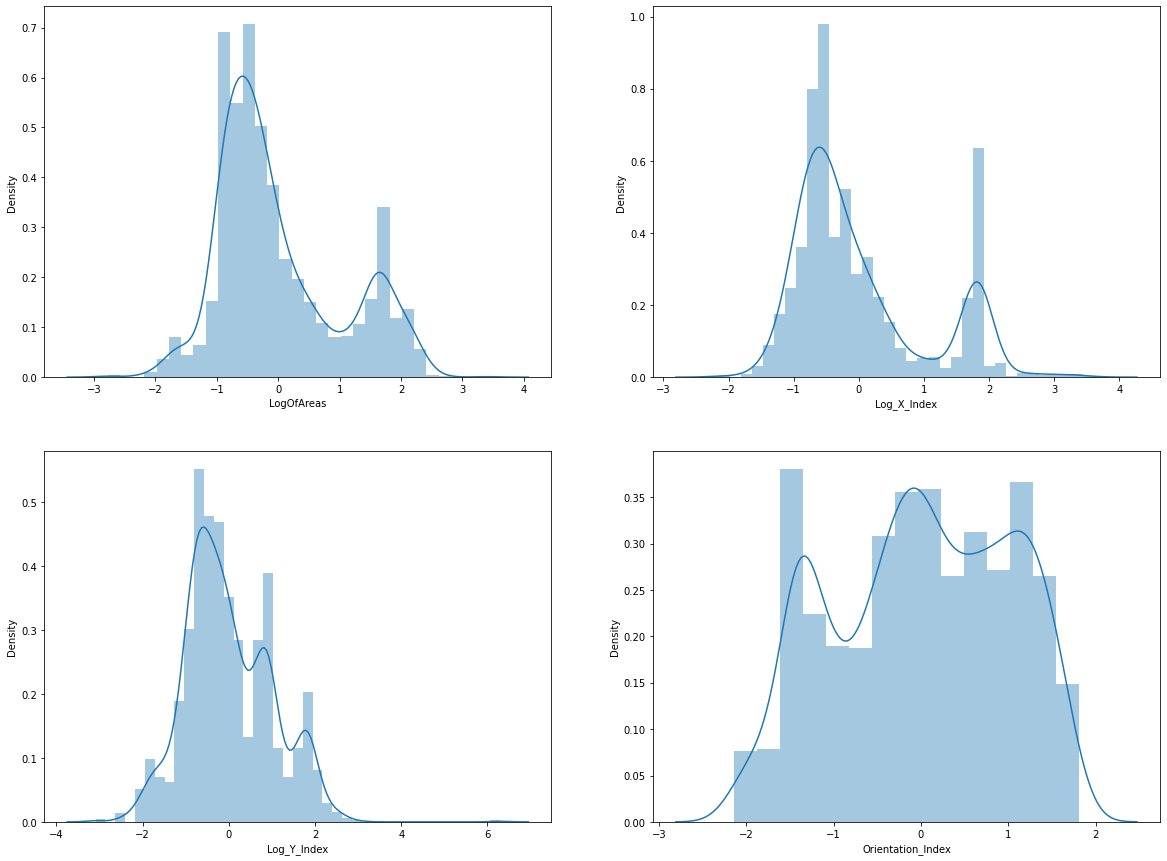

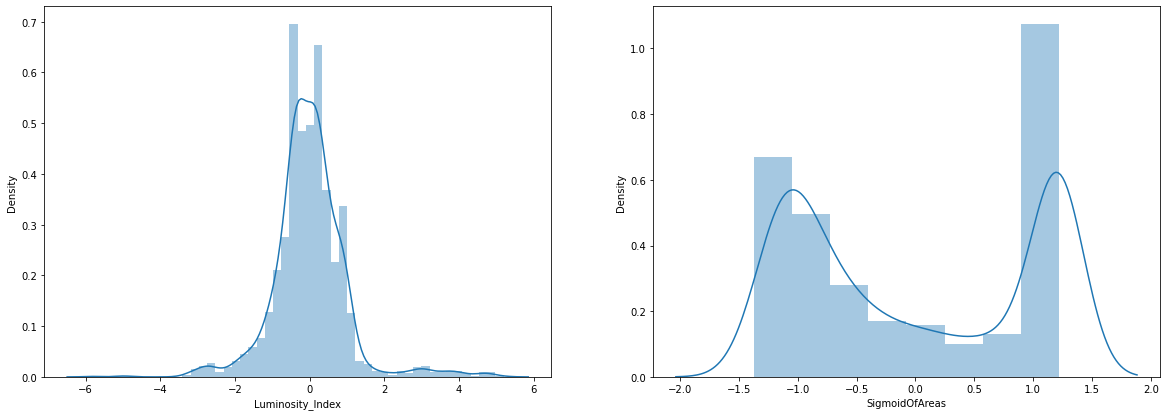

In [7]:
for i in range(0, len(X.columns), 4):
    if(i)<len(X.columns):
        plt.subplot(2,2,1)
        ax1 = sns.distplot(X.iloc[:,i])
        
    if(i+1)<len(X.columns):        
        plt.subplot(2,2,2)
        ax2 = sns.distplot(X.iloc[:,i+1])
        
    if(i+2)<len(X.columns):        
        plt.subplot(2,2,3)
        ax3 = sns.distplot(X.iloc[:,i+2])
       

    if(i+3)<len(X.columns):        
        plt.subplot(2,2,4)
        ax4 = sns.distplot(X.iloc[:,i+3])        
    plt.show()

### 2. Classwise distribution of fault types

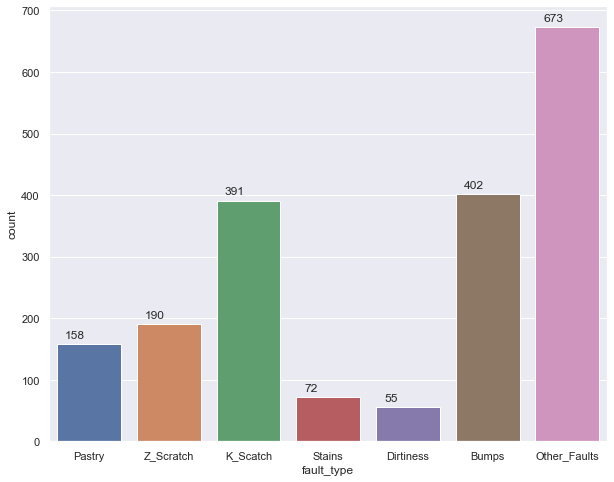

In [8]:
sns.set(rc={'figure.figsize':(10,8)})
ax = sns.countplot(x="fault_type", data=y)
for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.1, p.get_height()+10), fontsize=12)    

### 3. Correlation between features

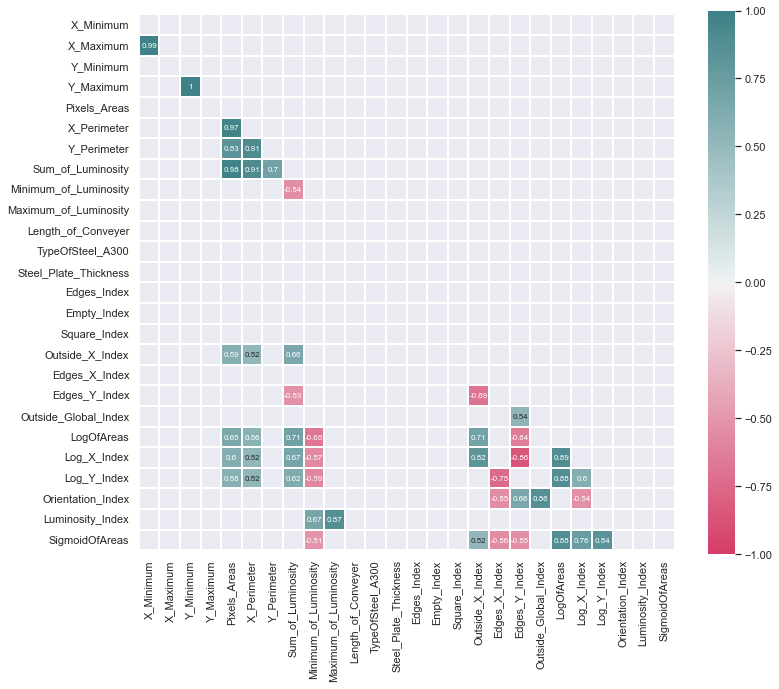

In [9]:
sns.set(rc={'figure.figsize':(12,10)})
corr = X.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots()
cmap = sns.diverging_palette(1,200, as_cmap=True)
sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.5)], mask=mask, cmap=cmap, vmax=1, vmin =-1, center=0,
            square=True, linewidths=2, annot = True, annot_kws={"size": 8});


### 4. Kernel Density Estimation(KDE) 

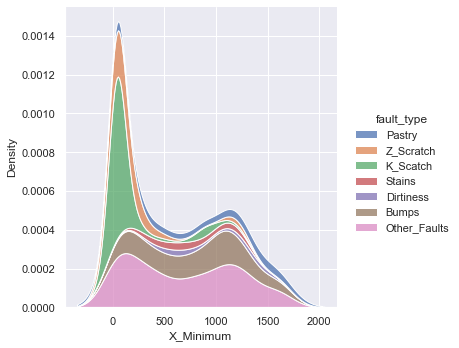

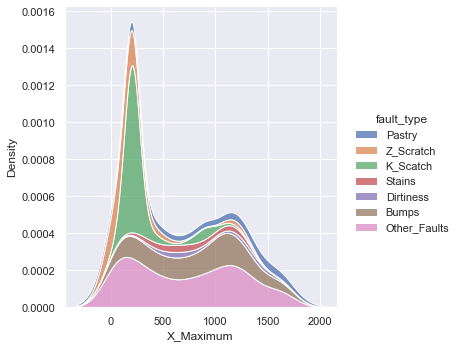

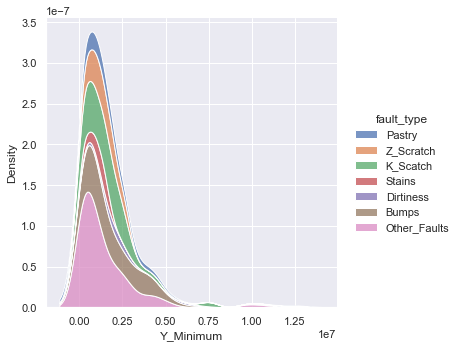

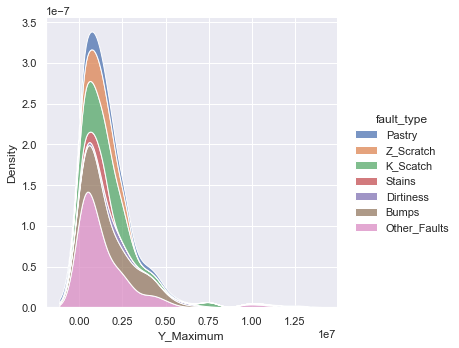

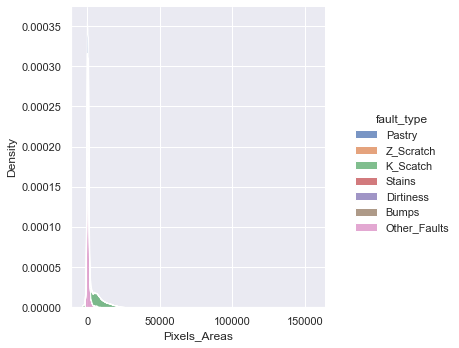

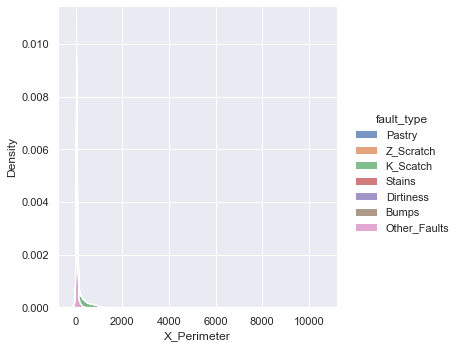

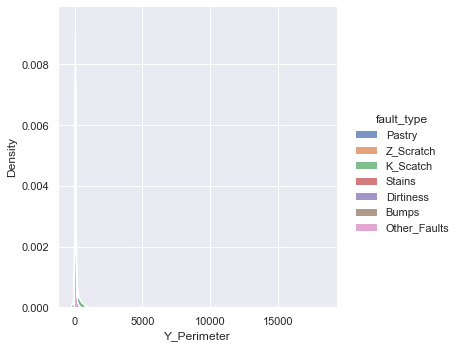

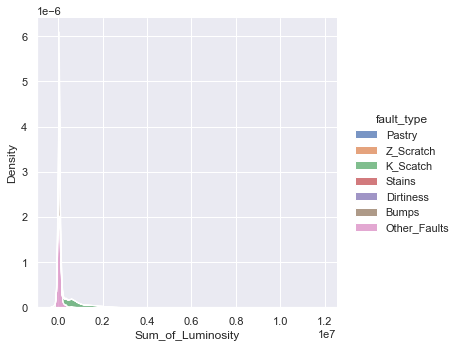

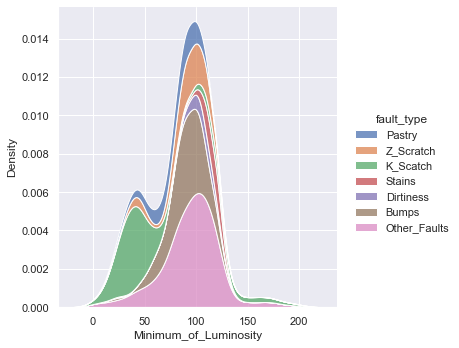

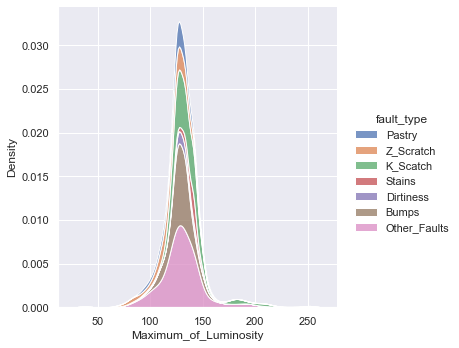

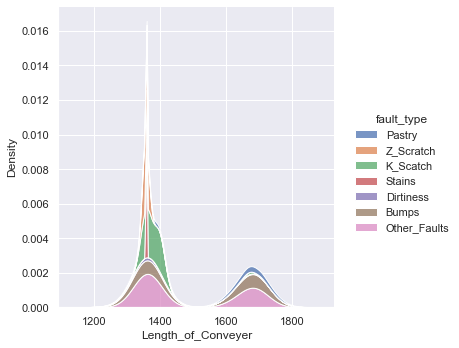

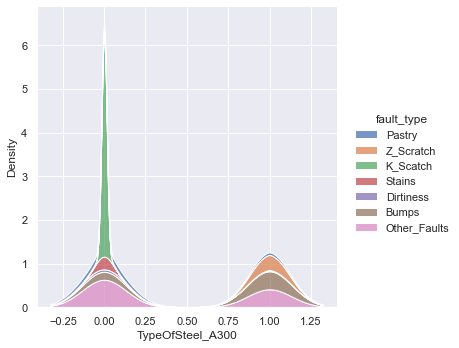

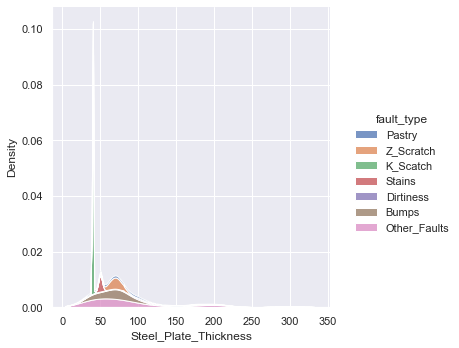

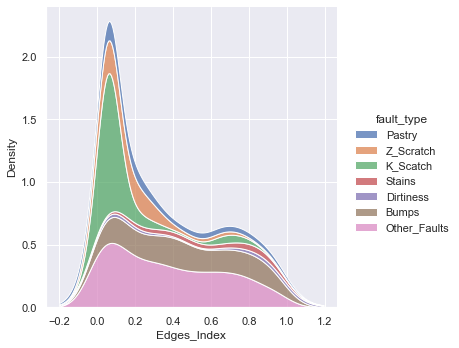

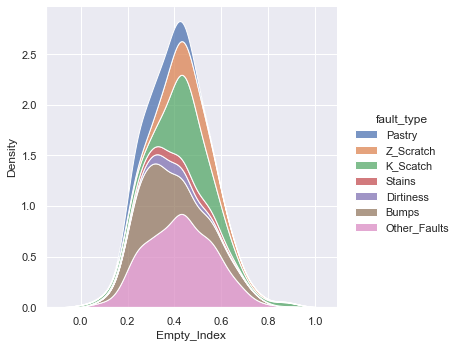

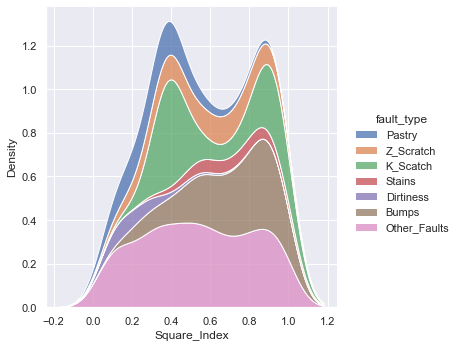

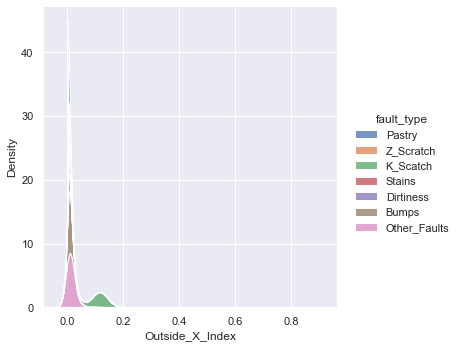

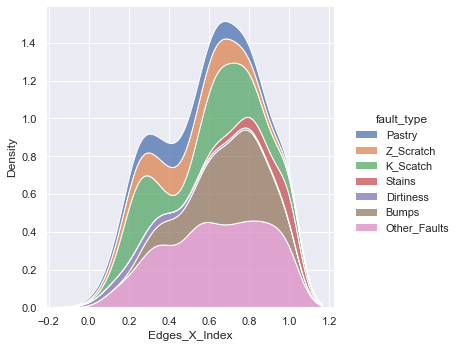

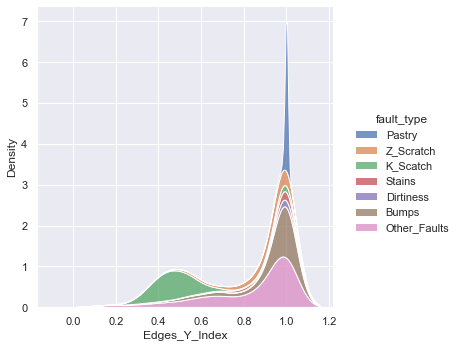

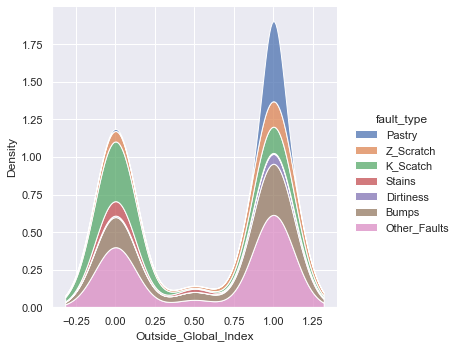

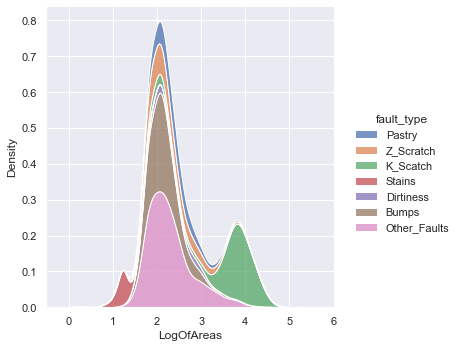

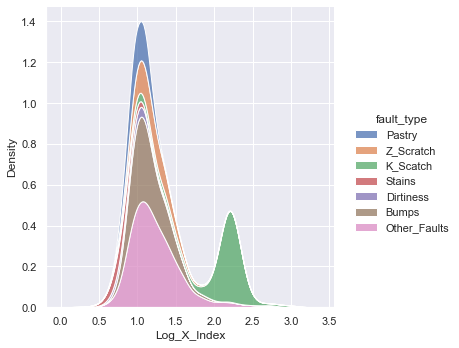

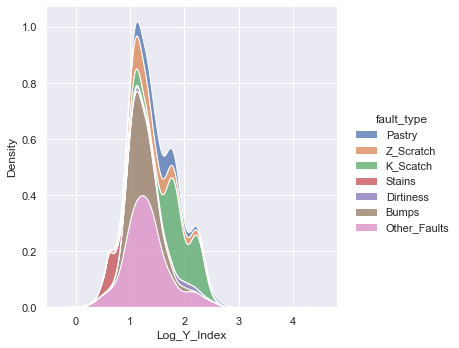

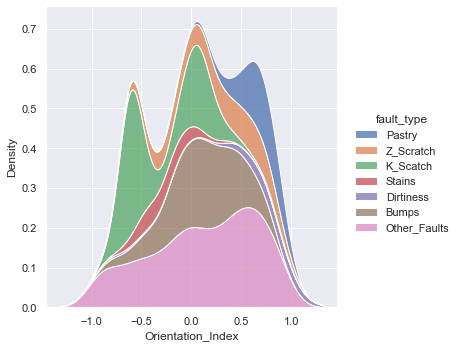

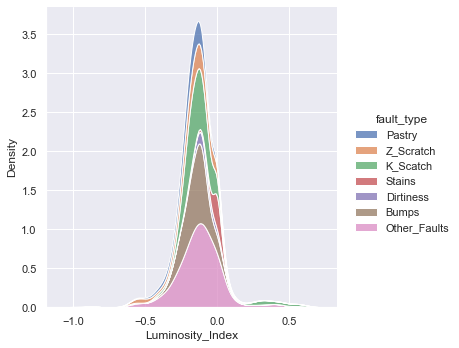

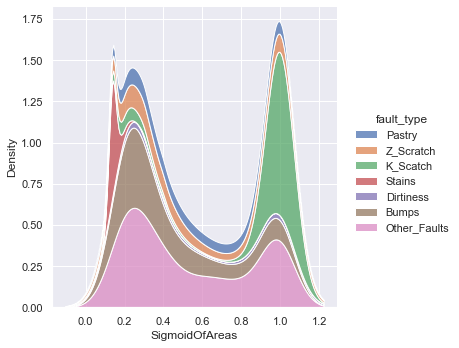

In [10]:
for i in range(0, len(X.columns), 1):
    sns.displot(data=df, x=(X.columns.tolist())[i], hue ='fault_type', kind='kde', multiple='stack')   

### 5. Box Plot

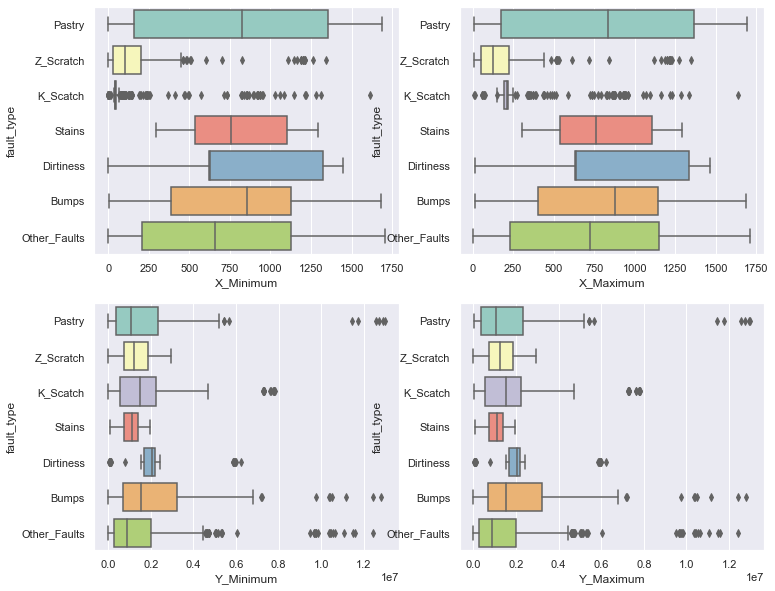

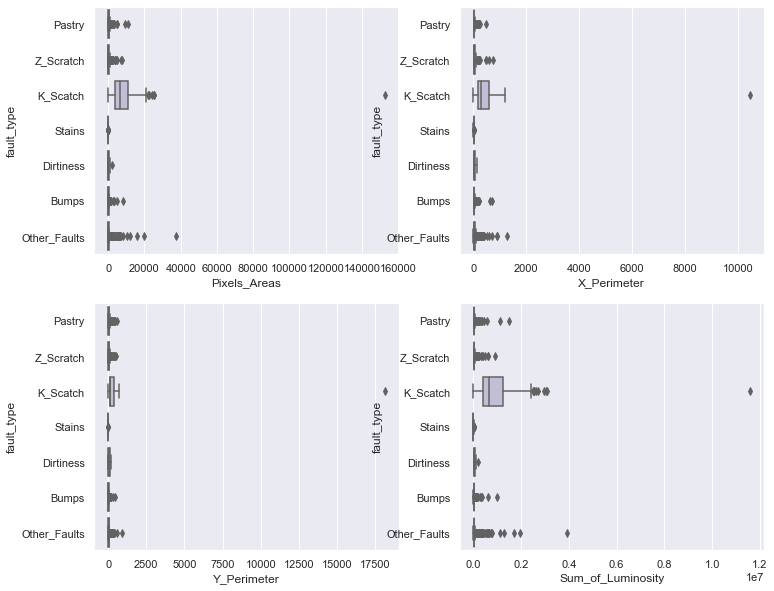

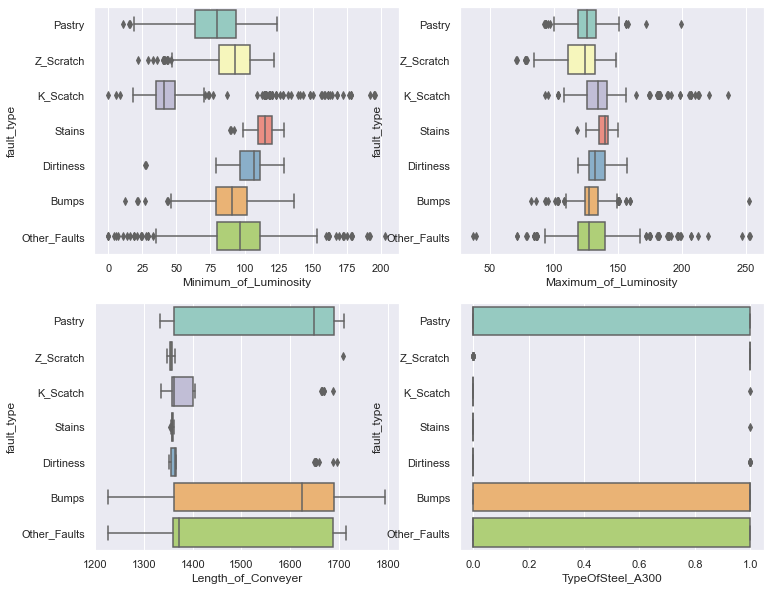

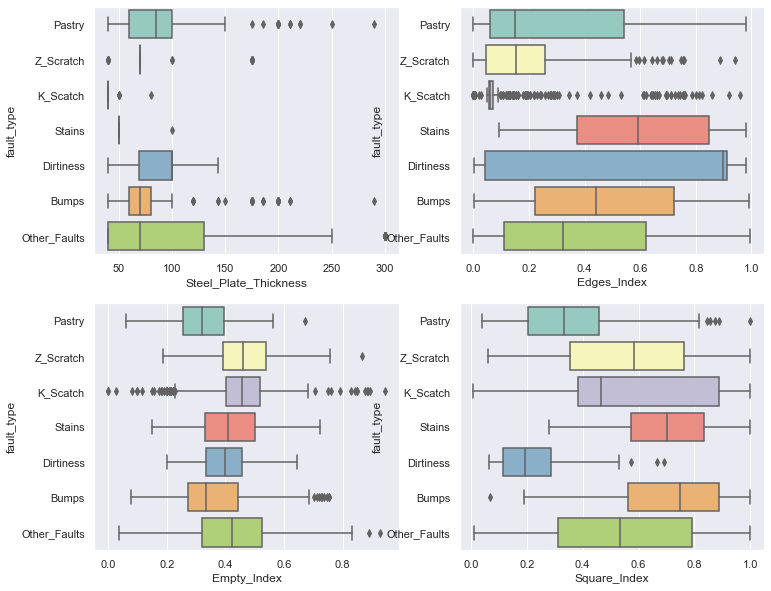

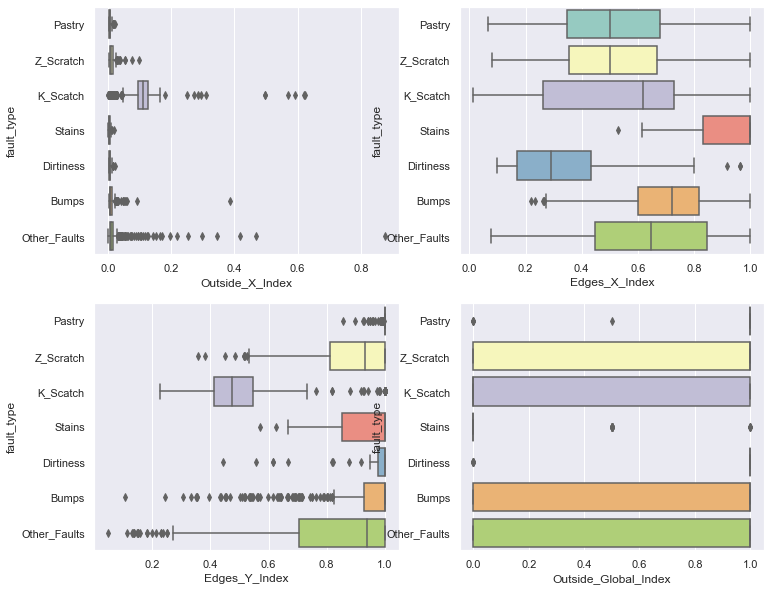

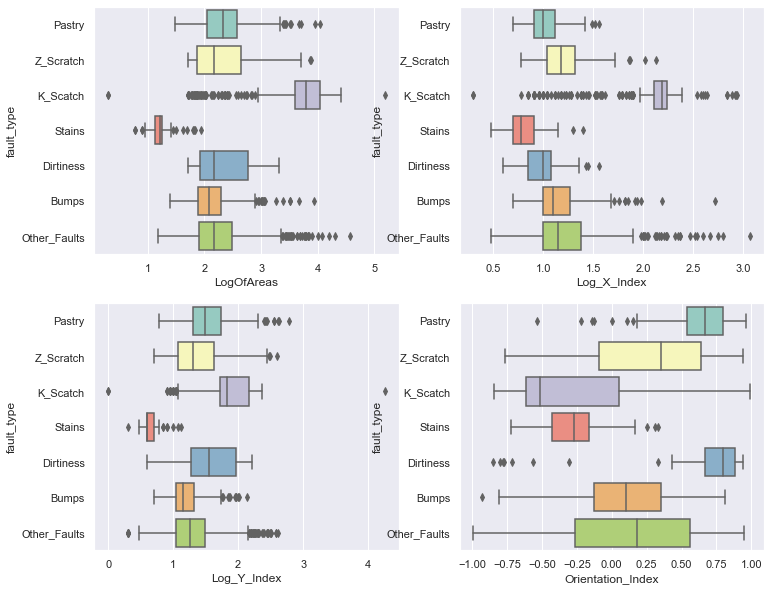

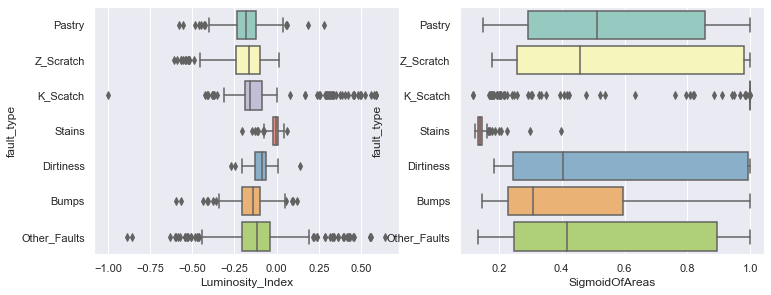

In [11]:
for i in range(0, len(X.columns), 4):
    if(i)<len(X.columns):
        plt.subplot(2,2,1)
        ax1 = sns.boxplot(data = df, x=X.columns.tolist()[i], y = 'fault_type', palette="Set3")
        
    if(i+1)<len(X.columns):        
        plt.subplot(2,2,2)
        ax2 = sns.boxplot(data = df, x=X.columns.tolist()[i+1], y = 'fault_type', palette="Set3")
        
    if(i+2)<len(X.columns):        
        plt.subplot(2,2,3)
        ax3 = sns.boxplot(data = df, x=X.columns.tolist()[i+2], y = 'fault_type', palette="Set3")
       

    if(i+3)<len(X.columns):        
        plt.subplot(2,2,4)
        ax4 = sns.boxplot(data = df, x=X.columns.tolist()[i+3], y = 'fault_type', palette="Set3")        
    plt.show()

### Outlier detection
1. Using the Z-scores, removing the ones which has z-score of less than -3 and greater than 3, if the data distribution follows the normal distribution.
2. Using the quartile ranges, if the value falls below the 1.5 times of IQR (inter quartile range) from Q1 (25 percentile) or above the 1.5 times of IQR from Q3 (75 percentile) it can be done if the data is skewed.
3. Using the clusters and providing the minimum distance and minimum samples to be in the cluster.

#### Checking normal distribution

####  a. Using histogram plot
If If the data roughly follows a bell curve shape in the histogram, then we can assume that the dataset is normally distributed.

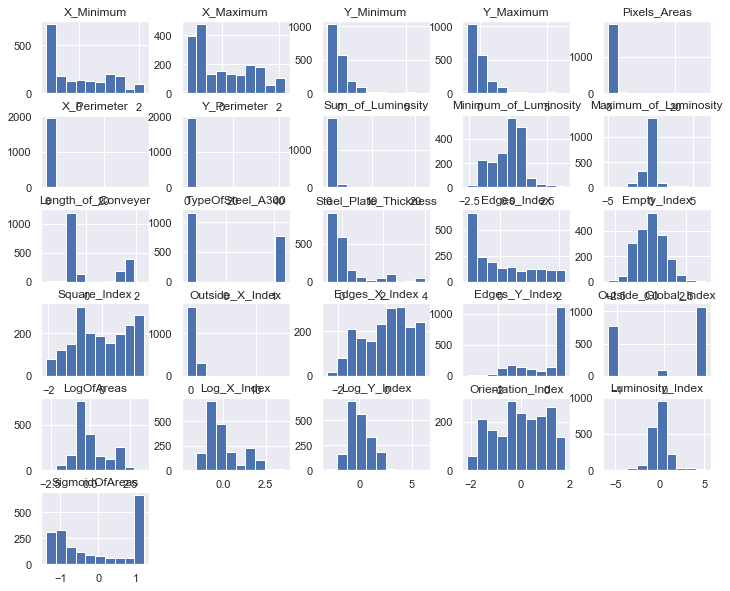

In [12]:
X.hist();

From the histogram, we seen that non of our data follows normal distribution.

#### b. Q-Q plot
If the data is normally distributed, the points in a Q-Q plot will lie on a straight diagonal line.

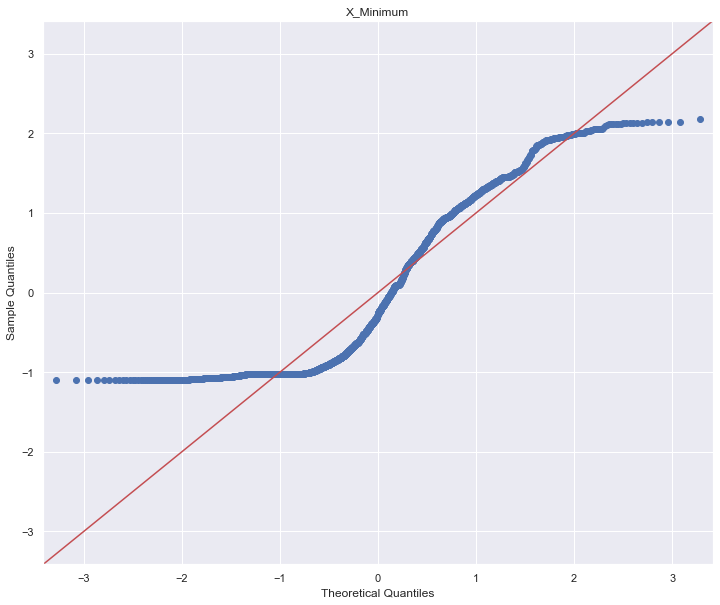

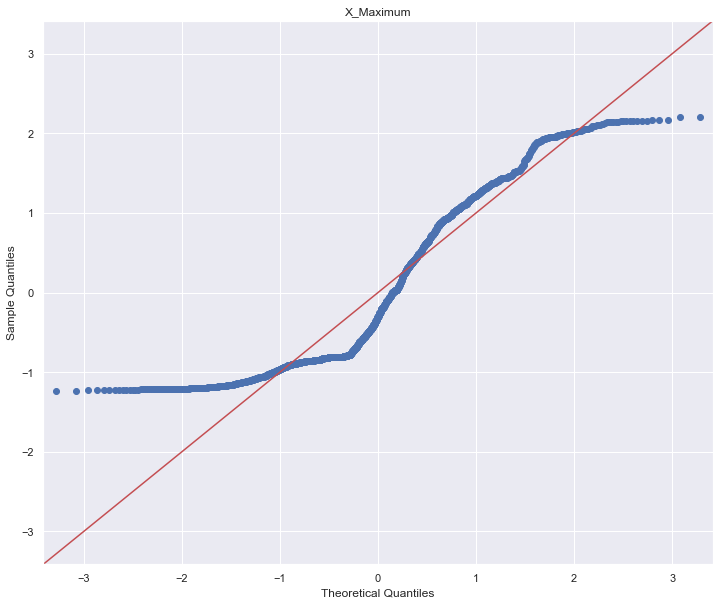

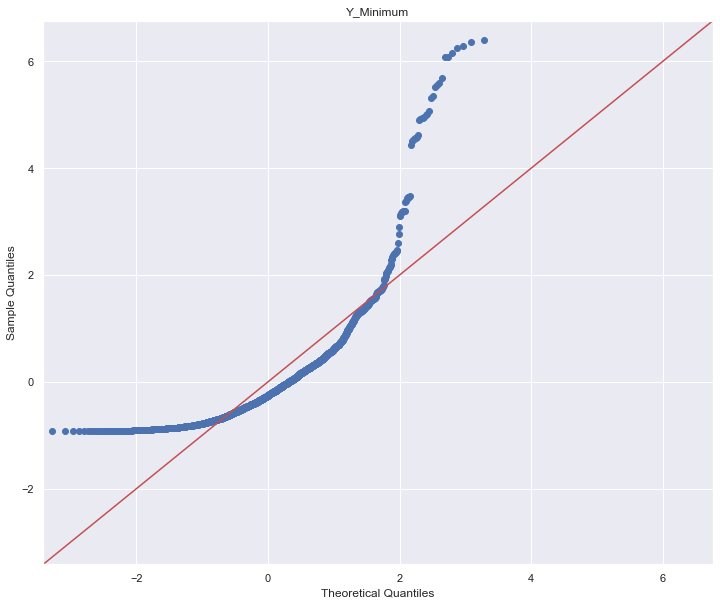

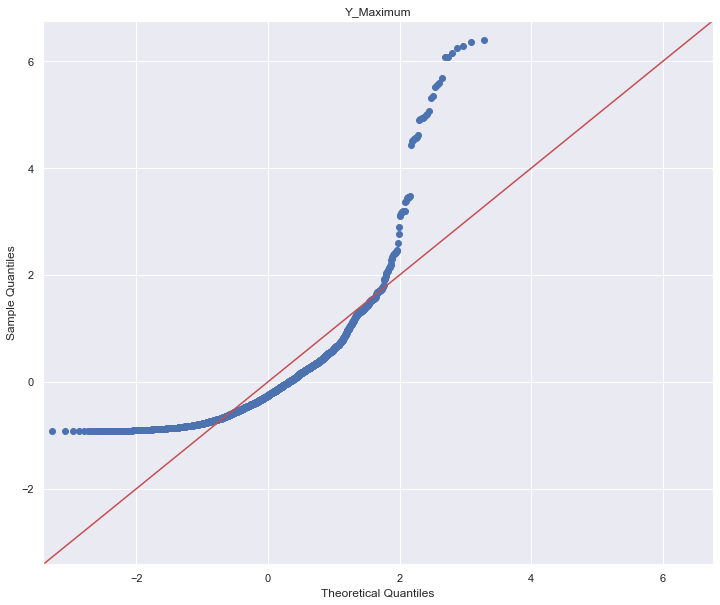

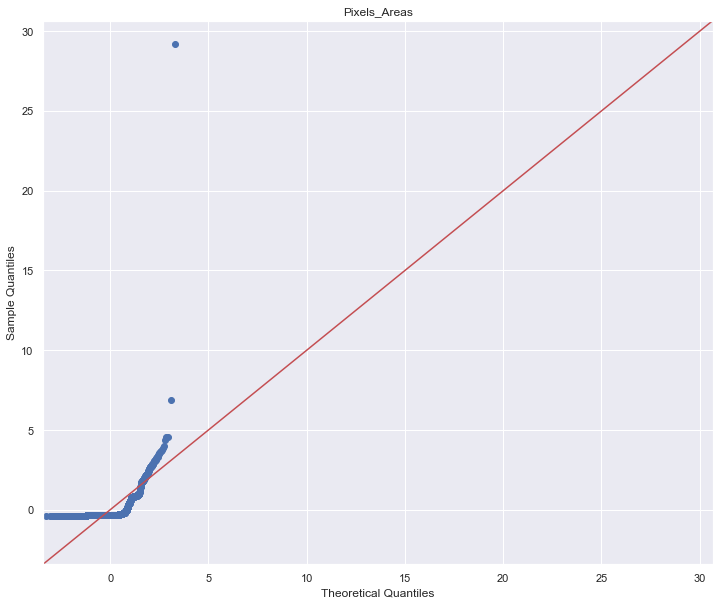

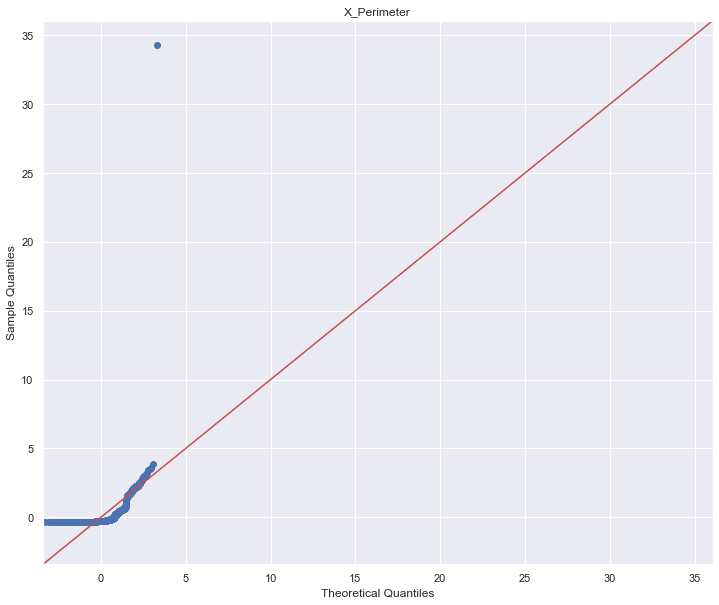

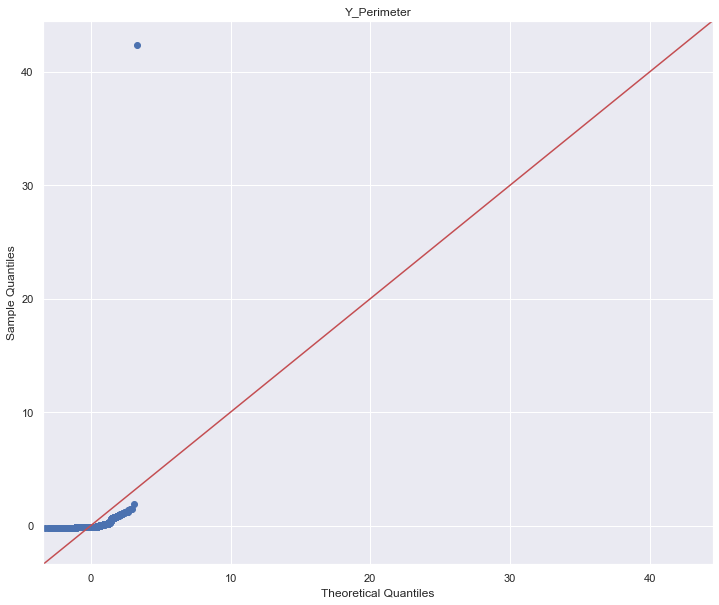

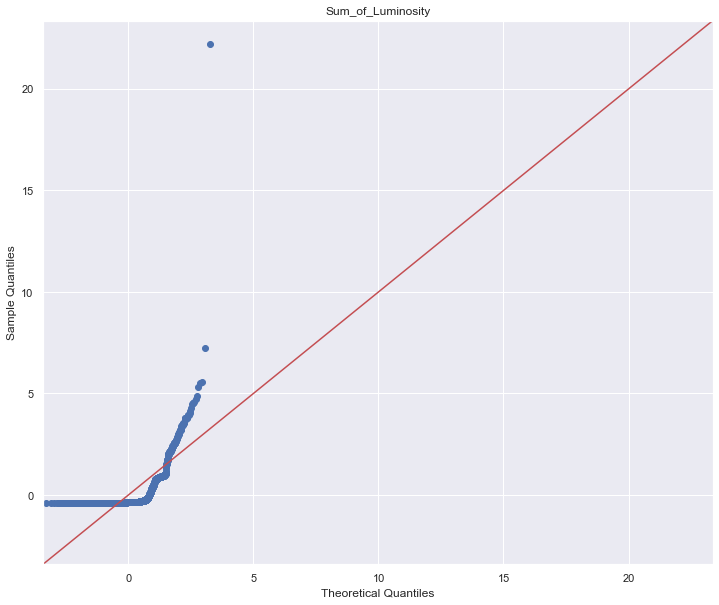

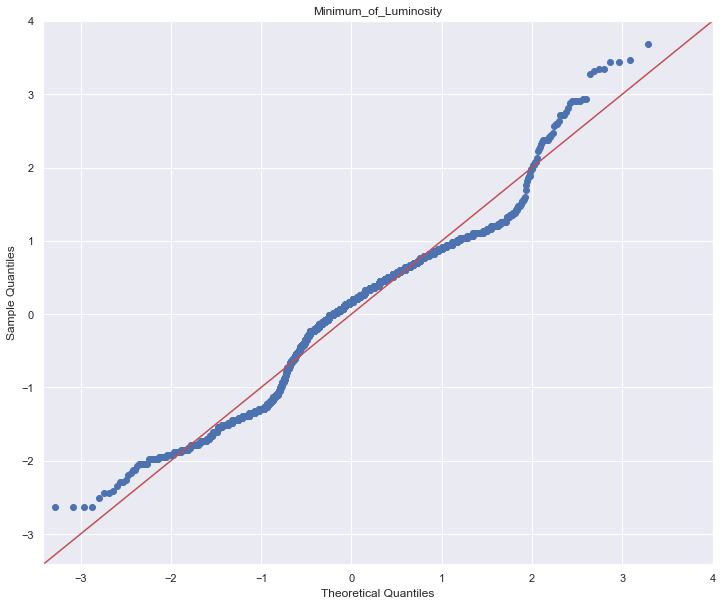

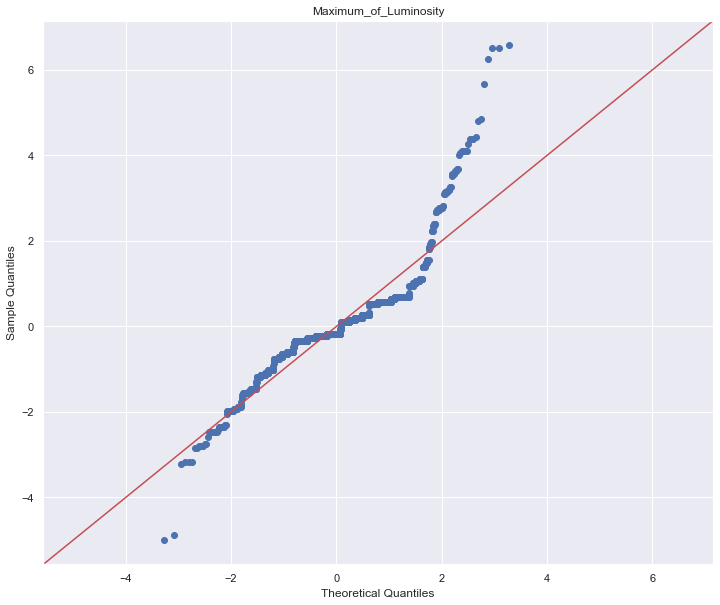

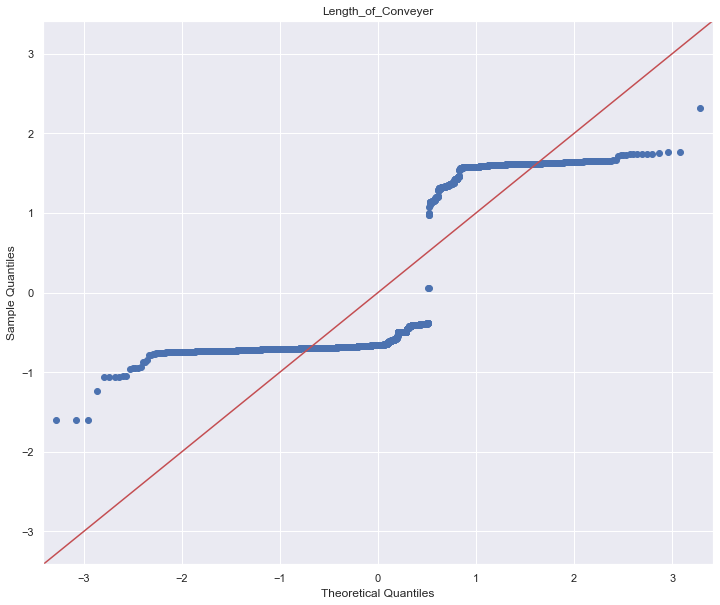

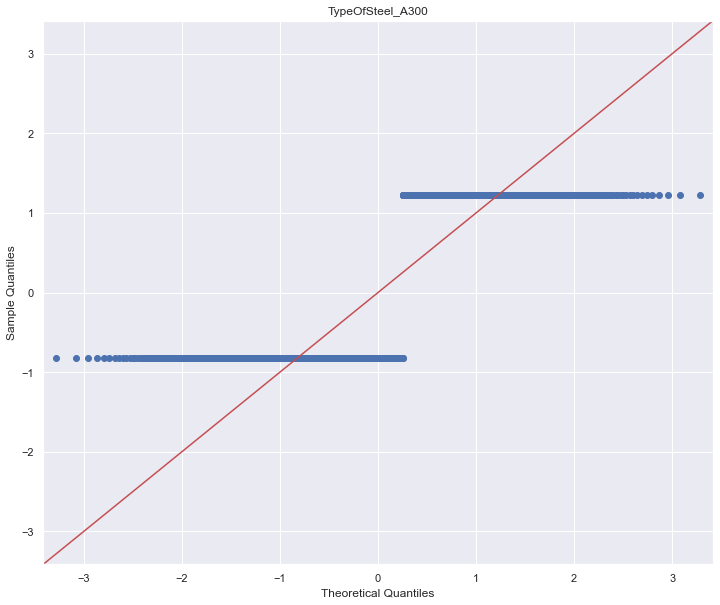

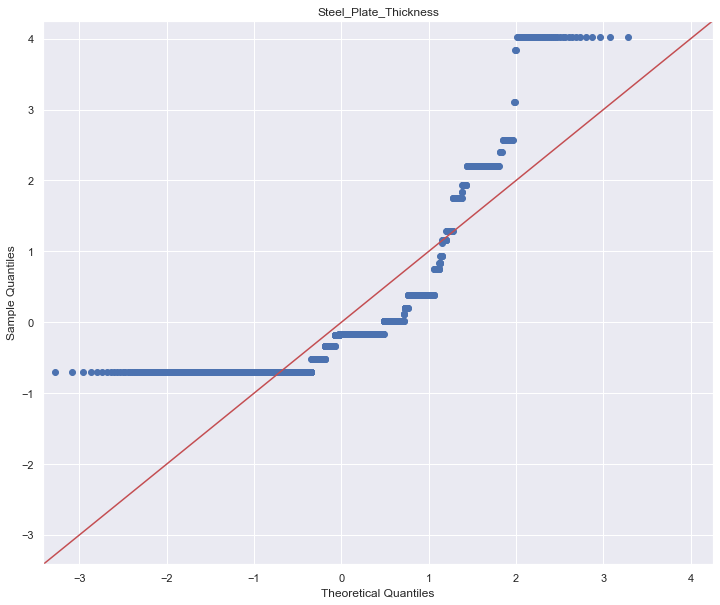

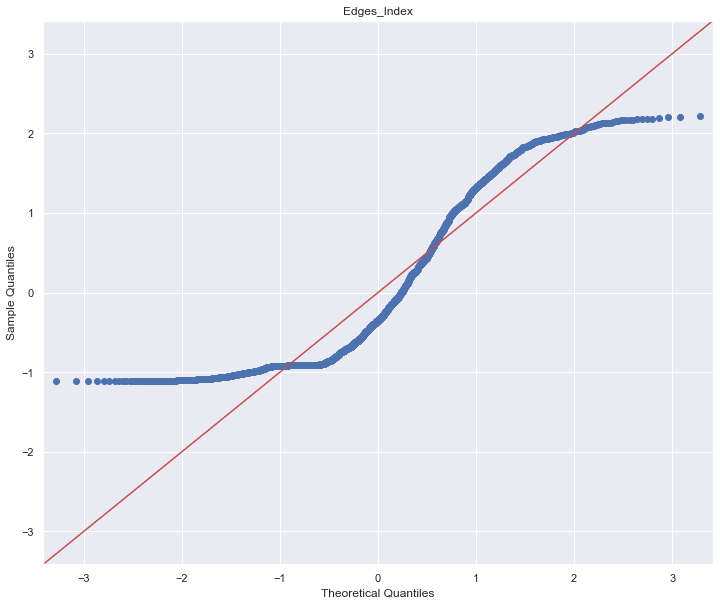

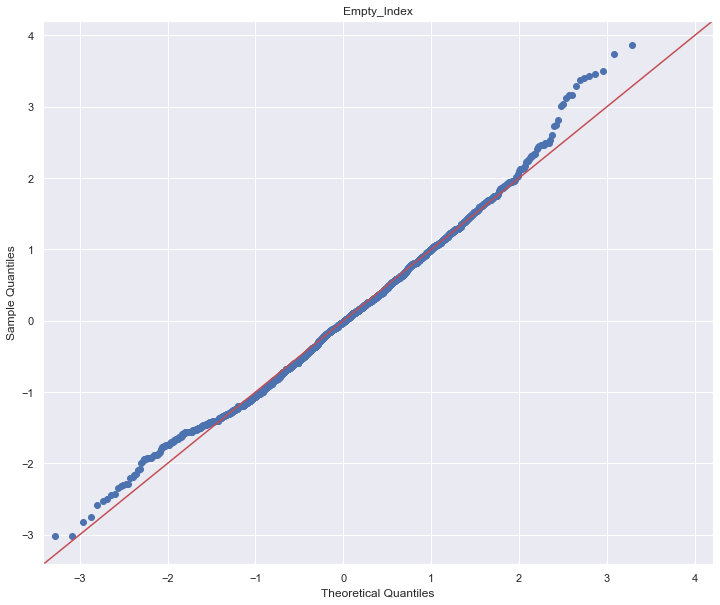

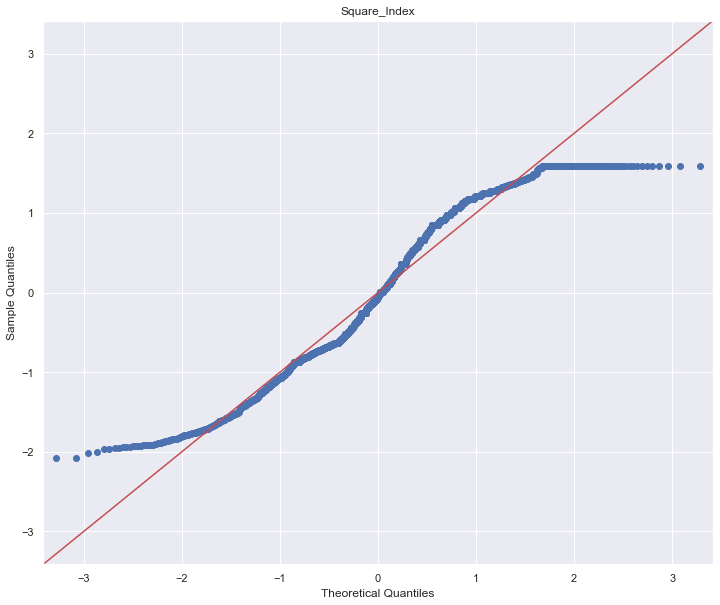

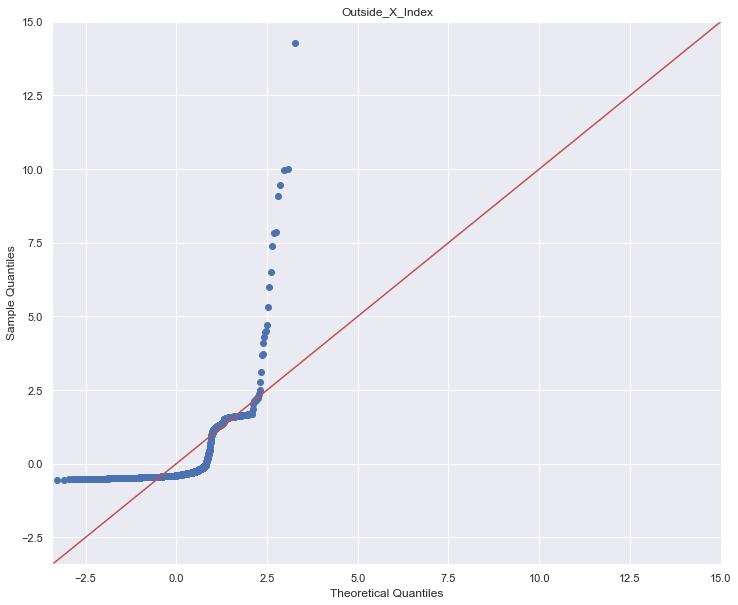

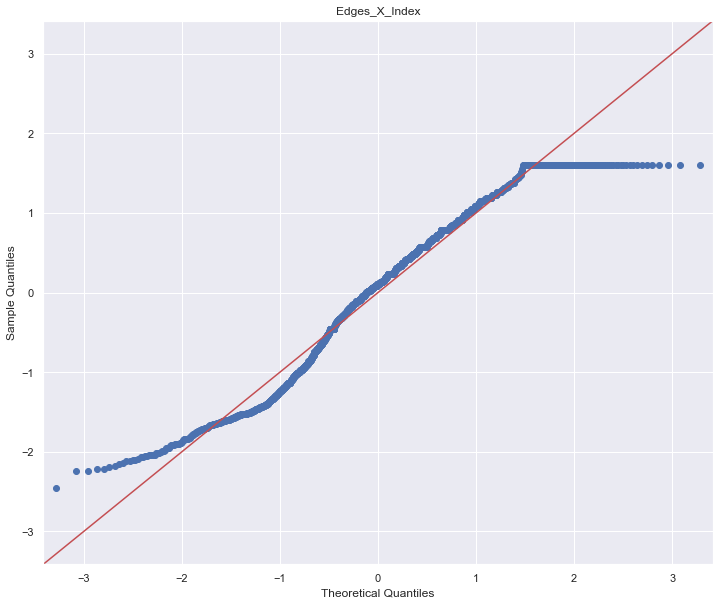

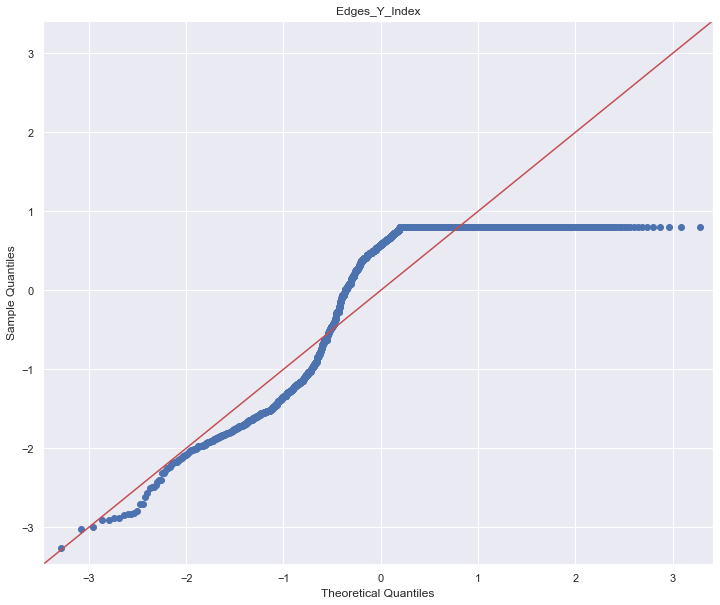

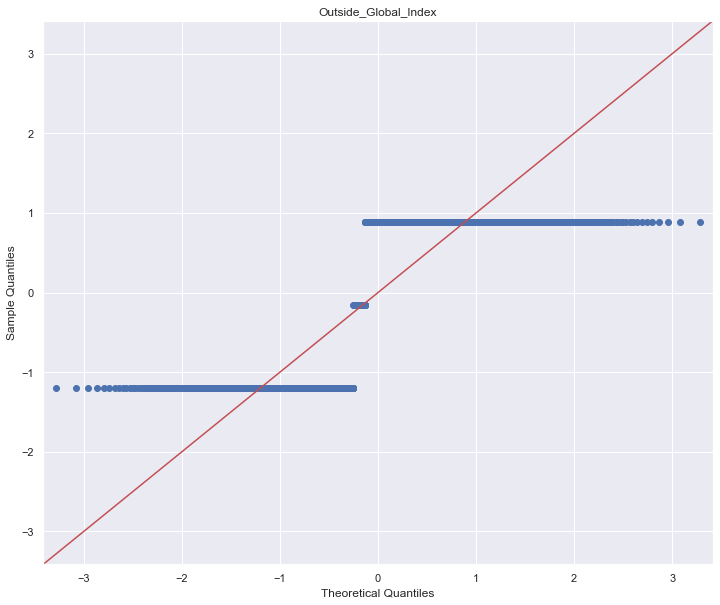

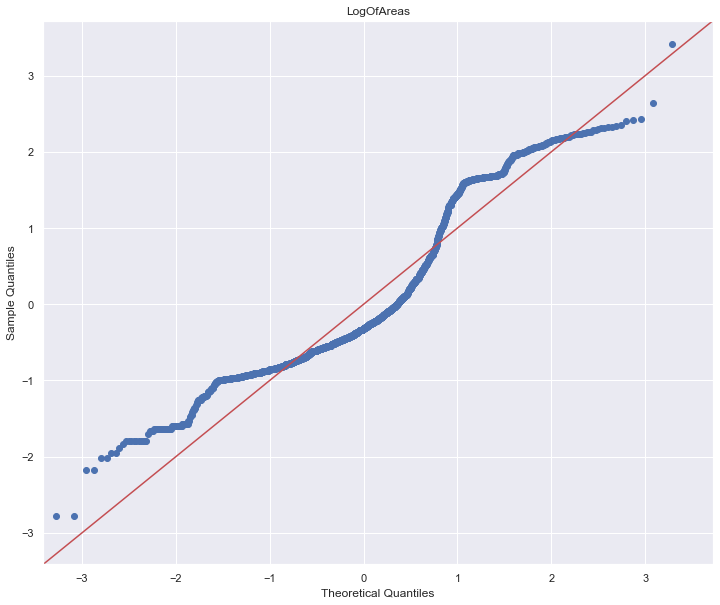

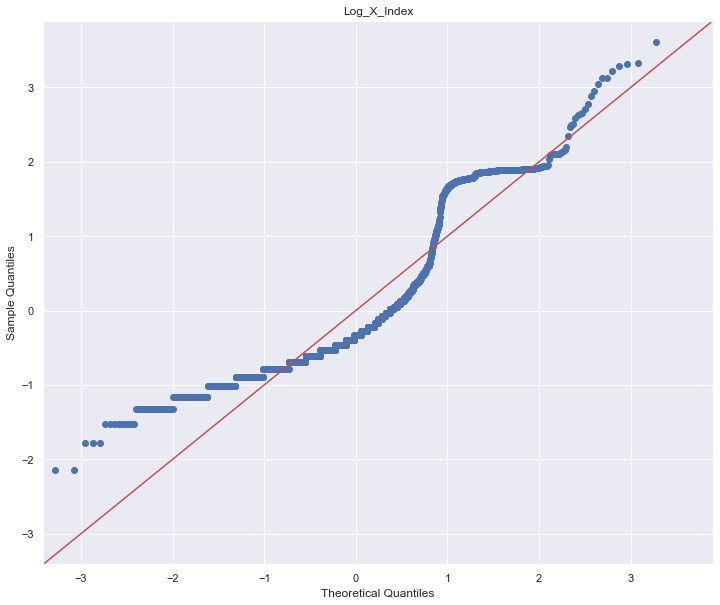

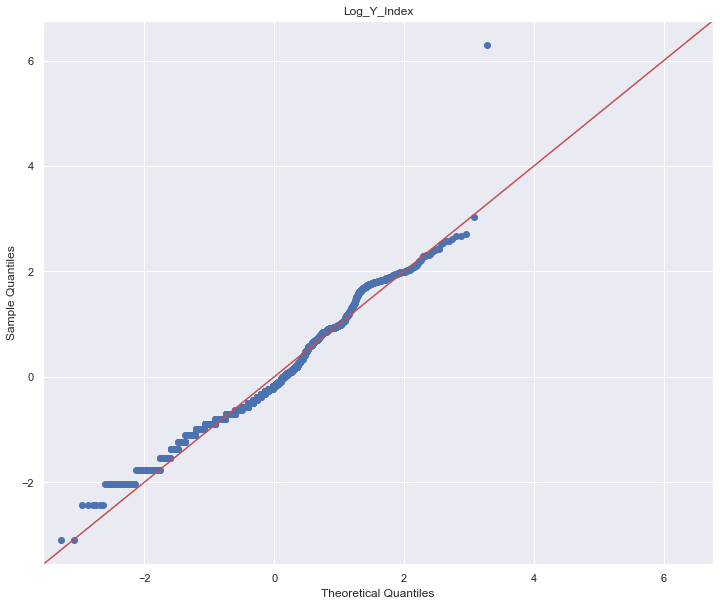

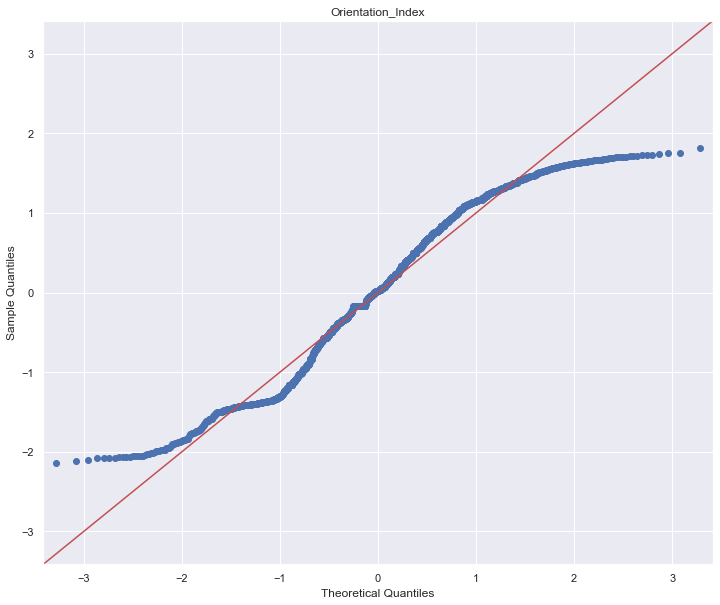

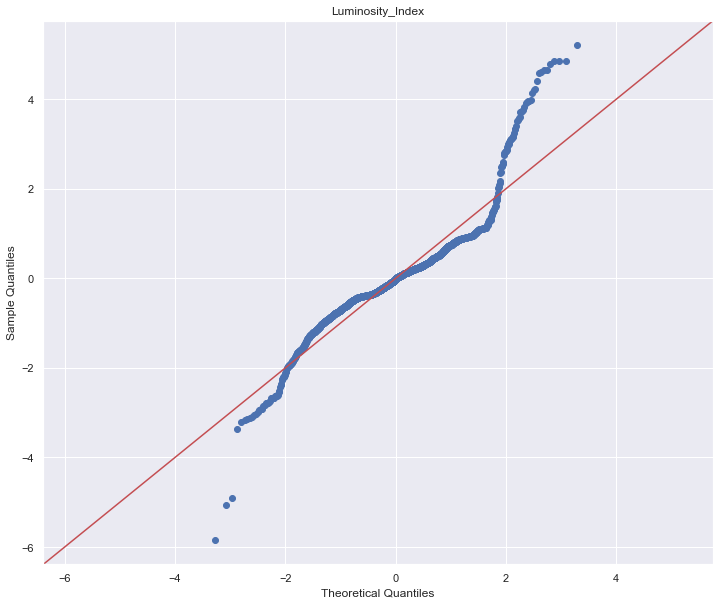

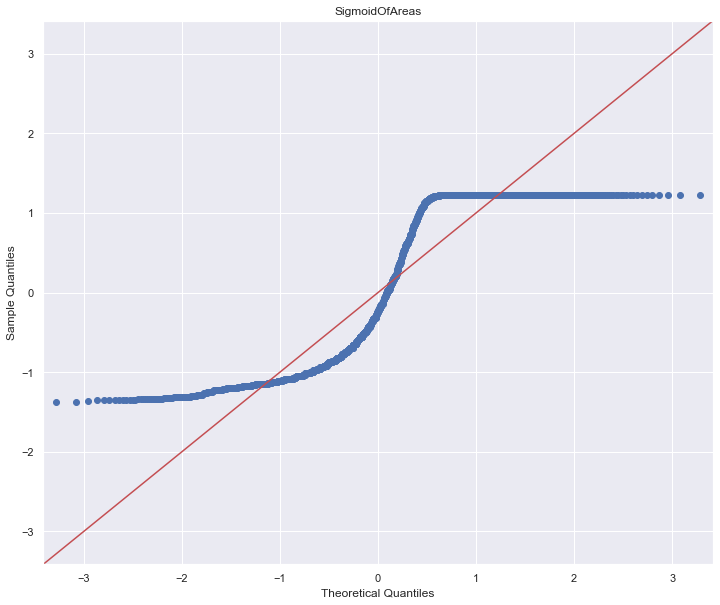

In [13]:
import statsmodels.api as sm
for i in range(len(X.columns)):
    fig = sm.qqplot(X[X.columns[i]], line='45')
    plt.title(X.columns[i])
    plt.show()

The data does not follow normal distribution. So, we are can't use Z-Score method for the outlier detection.

### Outlier removal using IQR

In [14]:
def iqr_outlier_remove(df):
    for i in df.columns:        
        q1 = df[i].quantile(0.25)
        q3 = df[i].quantile(0.75)
        iqr= q3-q1
        ltv= (q1- 1.5 * iqr)
        utv= (q3 + 1.5 * iqr)
        df= df[(df[i]<= utv) & (df[i]>= ltv)]    
    return df

In [15]:
X_iqr = iqr_outlier_remove(X)
y_iqr = y.iloc[X_iqr.index]

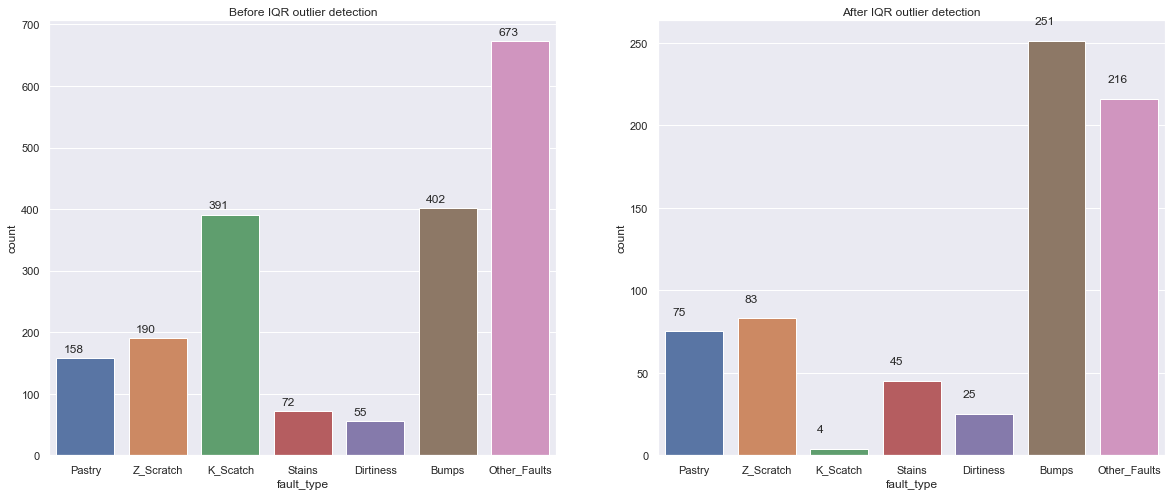

In [16]:
sns.set(rc={'figure.figsize':(20,8)})
plt.subplot(1,2,1)
ax1 = sns.countplot(x="fault_type", data=y)
ax1.set_title('Before IQR outlier detection')
for p in ax1.patches:
    ax1.annotate((p.get_height()), (p.get_x()+0.1, p.get_height()+10), fontsize=12)

plt.subplot(1,2,2)
ax2 = sns.countplot(x="fault_type", data=y_iqr)
ax2.set_title('After IQR outlier detection')
for p in ax2.patches:
    ax2.annotate((p.get_height()), (p.get_x()+0.1, p.get_height()+10), fontsize=12)

After applying the IQR outlier removal method, all the data associated with class k_scratch are removed. So we will look another method clustering.

###  Clustering based outlier removal

In [17]:
from sklearn.cluster import DBSCAN
from collections import Counter
eps_r = 0.01
while eps_r < 100:    
    dbscan_model = DBSCAN(eps=eps_r, min_samples=7).fit(X)    
    if Counter(dbscan_model.labels_)[-1] < 0.1*len(X):
        print('The neighbourhood distance considered for removal of less than 10 % outliers is: {}'.format(eps_r))
        break        
    eps_r = eps_r + 0.01

The neighbourhood distance considered for removal of less than 10 % outliers is: 2.6399999999999877


In [18]:
dbscan_model = DBSCAN(eps=eps_r, min_samples=7).fit(X)
outliers = X[dbscan_model.labels_ == -1]
X_cluster= X.copy()
y_cluster = y.copy()
X_cluster.drop(outliers.index, axis=0, inplace=True)
y_cluster.drop(outliers.index, axis=0, inplace=True)
X_cluster

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas
0,-1.016481,-1.141639,-0.777729,-0.777729,-0.314852,-0.314996,-0.091389,-0.355537,-0.266099,-1.187708,...,-0.486227,-0.575331,0.796401,0.879804,-0.083538,-0.898437,0.528872,1.467656,-1.075752,-0.009490
1,0.141894,0.066403,0.500188,0.500171,-0.345623,-0.338242,-0.124225,-0.380574,-0.017079,-0.384975,...,-0.504888,-0.043290,0.654223,0.879804,-0.581936,-1.157841,0.130174,1.417530,-0.297824,-0.845759
2,0.495362,0.436253,-0.054546,-0.054566,-0.352784,-0.344883,-0.150024,-0.387261,0.449832,-0.277944,...,-0.503191,0.573451,0.571820,0.879804,-0.812814,-1.157841,-0.325764,1.165103,0.057185,-1.091513
3,0.541467,0.486504,-0.722225,-0.722225,-0.332463,-0.328279,-0.089044,-0.365736,0.449832,-0.224429,...,-0.477744,-0.296153,0.796401,0.879804,-0.313021,-1.018897,0.550227,1.519978,-0.171419,-0.189237
4,1.379032,1.382988,-0.649678,-0.649559,0.099692,-0.172201,0.415209,0.079307,-1.480069,-0.224429,...,-0.352206,-1.345434,0.747301,0.879804,1.127655,-0.218461,2.216130,1.698514,-0.456503,1.221636
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1936,-0.618830,-0.685357,-0.746795,-0.746811,-0.313690,-0.192126,-0.142987,-0.334424,1.072381,0.578304,...,-0.216488,-0.378385,-0.367922,-1.193905,-0.071239,0.231603,-0.438483,-1.022264,0.900332,0.412476
1937,-0.820537,-0.890382,-0.738452,-0.738468,-0.310981,-0.225334,-0.138297,-0.335271,0.854489,0.150180,...,-0.179166,0.386784,-0.449045,-1.193905,-0.043727,0.323402,-0.380362,-1.068196,0.491534,0.683276
1938,-0.818616,-0.892392,-0.712412,-0.712430,-0.310013,-0.238617,-0.142987,-0.329467,1.103509,0.524788,...,-0.204613,0.470661,-0.562189,-1.193905,-0.034218,0.263172,-0.500126,-1.130504,0.917814,0.360909
1939,-0.833984,-0.900432,-0.692280,-0.692288,-0.285435,-0.049331,-0.084353,-0.299900,1.010126,0.524788,...,-0.153719,-1.111484,-0.656975,-1.193905,0.164584,0.379686,0.194019,-0.287351,0.767876,1.197767


## Feature Selection 

There are three different feature selection models namely, filter, wrapper and embedded.
Since filters model is only dependent on independent variables, they are independent
of the learning algorithm. Another model, wrappers optimize with the specific learning
function in the loop by assessing the performance of the different feature subsets depending
on the cost function. And the last model, the embedded models are built into
learning algorithm itself.
1. Filter Method - Univariate and Multivariate
2. Wrapper Method
3. Embeded Method

### 1. Filter Method- Univariate method

The filter method ranks each feature based on some uni-variate metric and then selects the highest-ranking features. 

- variance: removing constant and quasi constant features
- chi-square: used for classification. It is a statistical test of independence to determine the dependency of two variables.
- correlation coefficients: removes duplicate features
- Information gain or mutual information: assess the dependency of the independent variable in predicting the target variable. 

Select independent features with
- High correlation with the target variable
- Low correlation with another independent variable
- Higher information gain or mutual information of the independent variable

###  Variance Method - Removing all low-variance features (constant features)

We mostly apply variance method of feature selection to the original datasets.  

In [19]:
var_res =X_cluster.var()
var_res

X_Minimum                1.012765
X_Maximum                1.007703
Y_Minimum                0.747595
Y_Maximum                0.747582
Pixels_Areas             0.507493
X_Perimeter              0.350532
Y_Perimeter              0.063534
Sum_of_Luminosity        0.677089
Minimum_of_Luminosity    0.875187
Maximum_of_Luminosity    0.669358
Length_of_Conveyer       0.991805
TypeOfSteel_A300         0.997008
Steel_Plate_Thickness    0.891562
Edges_Index              1.003559
Empty_Index              0.876396
Square_Index             0.965429
Outside_X_Index          0.504710
Edges_X_Index            0.955729
Edges_Y_Index            0.939387
Outside_Global_Index     0.992855
LogOfAreas               0.970469
Log_X_Index              0.938691
Log_Y_Index              0.903248
Orientation_Index        0.944827
Luminosity_Index         0.747869
SigmoidOfAreas           0.985073
dtype: float64

In [21]:
from sklearn.feature_selection import VarianceThreshold
variance_filter = VarianceThreshold(threshold=0.1)
sel= variance_filter.fit(X_cluster)
selected_features= sel.get_feature_names_out(input_features=X_cluster.columns)
print('{} features are removed.'.format(len(X_cluster.columns)-len(selected_features)))
print('\n{} are removed.'.format((set(X_cluster.columns)-set(selected_features))))
print('\nSelected features are:\n',selected_features)
X_var= X_cluster[selected_features]
y_var = y_cluster

1 features are removed.

{'Y_Perimeter'} are removed.

Selected features are:
 ['X_Minimum' 'X_Maximum' 'Y_Minimum' 'Y_Maximum' 'Pixels_Areas'
 'X_Perimeter' 'Sum_of_Luminosity' 'Minimum_of_Luminosity'
 'Maximum_of_Luminosity' 'Length_of_Conveyer' 'TypeOfSteel_A300'
 'Steel_Plate_Thickness' 'Edges_Index' 'Empty_Index' 'Square_Index'
 'Outside_X_Index' 'Edges_X_Index' 'Edges_Y_Index' 'Outside_Global_Index'
 'LogOfAreas' 'Log_X_Index' 'Log_Y_Index' 'Orientation_Index'
 'Luminosity_Index' 'SigmoidOfAreas']


### Knn after Variance threshold

In [22]:
x_train, x_test, y_train, y_test = train_test_split(X_var, y_var, test_size=0.2,random_state=100)
knn = KNeighborsClassifier()
k_range = list(range(1, 100))
param_grid = { 'n_neighbors': k_range, 'weights': ['uniform', 'distance'], 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'] }
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score=False,verbose=1)
grid_search=grid.fit(x_train, y_train)
print()
print(grid_search.best_params_)
accuracy = grid_search.best_score_ *100
print("Accuracy for training dataset with tuning is : {:.2f}%".format(accuracy))

knn = KNeighborsClassifier(algorithm=grid_search.best_params_['algorithm'], 
                           n_neighbors=grid_search.best_params_['n_neighbors'],
                           weights=grid_search.best_params_['weights'])
knn.fit(x_train, y_train)
y_test_pred=knn.predict(x_test)
test_accuracy=accuracy_score(y_test,y_test_pred)*100
print("Accuracy for testing dataset with tuning is : {:.2f} %".format(test_accuracy))

Fitting 10 folds for each of 792 candidates, totalling 7920 fits

{'algorithm': 'auto', 'n_neighbors': 9, 'weights': 'distance'}
Accuracy for training dataset with tuning is : 74.95%
Accuracy for testing dataset with tuning is : 79.43 %


### Anova  test

In [25]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2,  f_classif
chi_filter = SelectKBest(f_classif, k=15)
select= chi_filter.fit(X_var, y_var)
selected_features_chi= select.get_feature_names_out(input_features=X_var.columns)
print('{} features are removed.'.format(len(X_var.columns)-len(selected_features_chi)))
print('\n{} are removed.'.format((set(X_cluster.columns)-set(selected_features_chi))))
print('\nSelected features are:\n',selected_features_chi)
X_chi= X_var[selected_features_chi]
y_chi = y_var

10 features are removed.

{'Y_Maximum', 'Y_Minimum', 'Maximum_of_Luminosity', 'Edges_X_Index', 'Luminosity_Index', 'Y_Perimeter', 'Square_Index', 'Steel_Plate_Thickness', 'Outside_Global_Index', 'Empty_Index', 'Edges_Index'} are removed.

Selected features are:
 ['X_Minimum' 'X_Maximum' 'Pixels_Areas' 'X_Perimeter' 'Sum_of_Luminosity'
 'Minimum_of_Luminosity' 'Length_of_Conveyer' 'TypeOfSteel_A300'
 'Outside_X_Index' 'Edges_Y_Index' 'LogOfAreas' 'Log_X_Index'
 'Log_Y_Index' 'Orientation_Index' 'SigmoidOfAreas']


## KNN after f_classif 

In [30]:
train_acc=list()
test_acc=list()
for i in range(1, len(X_var.columns)-1):    
    print("--------------------------------")
    print('No. of best selected features:',i)
    chi_filter = SelectKBest(f_classif, k=i)
    select= chi_filter.fit(X_var, y_var)
    selected_features_chi= select.get_feature_names_out(input_features=X_var.columns)
    X_chi= X_var[selected_features_chi]
    y_chi = y_var
    x_train, x_test, y_train, y_test = train_test_split(X_chi, y_chi, test_size=0.2,random_state=100)
    knn = KNeighborsClassifier()
    k_range = list(range(1, 100))
    param_grid = { 'n_neighbors': k_range, 'weights': ['uniform', 'distance'], 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'] }
    grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score=False,verbose=1)
    grid_search=grid.fit(x_train, y_train)
    print(grid_search.best_params_)
    accuracy = grid_search.best_score_ *100
    print("Accuracy for training dataset : {:.2f}%".format(accuracy))

    knn = KNeighborsClassifier(algorithm=grid_search.best_params_['algorithm'], 
                               n_neighbors=grid_search.best_params_['n_neighbors'],
                               weights=grid_search.best_params_['weights'])
    knn.fit(x_train, y_train)
    y_test_pred=knn.predict(x_test)
    test_accuracy=accuracy_score(y_test,y_test_pred)*100
    print("Accuracy for testing dataset : {:.2f} %".format(test_accuracy))
    train_acc.append(accuracy)
    test_acc.append(test_accuracy)

--------------------------------
No. of best selected features: 1
Fitting 10 folds for each of 792 candidates, totalling 7920 fits
{'algorithm': 'brute', 'n_neighbors': 32, 'weights': 'uniform'}
Accuracy for training dataset : 51.97%
Accuracy for testing dataset : 50.29 %
--------------------------------
No. of best selected features: 2
Fitting 10 folds for each of 792 candidates, totalling 7920 fits
{'algorithm': 'ball_tree', 'n_neighbors': 18, 'weights': 'uniform'}
Accuracy for training dataset : 52.68%
Accuracy for testing dataset : 49.71 %
--------------------------------
No. of best selected features: 3
Fitting 10 folds for each of 792 candidates, totalling 7920 fits
{'algorithm': 'auto', 'n_neighbors': 17, 'weights': 'uniform'}
Accuracy for training dataset : 54.40%
Accuracy for testing dataset : 56.29 %
--------------------------------
No. of best selected features: 4
Fitting 10 folds for each of 792 candidates, totalling 7920 fits
{'algorithm': 'auto', 'n_neighbors': 14, 'weigh